# Evaluate mock community classification accuracy
The purpose of this notebook is to evaluate taxonomic classification accuracy of mock communities using different classification methods.

Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report. 

In [1]:
%matplotlib inline
from os.path import join, exists, expandvars
import pandas as pd
from IPython.display import display, Markdown
import seaborn.xkcd_rgb as colors
from tax_credit.plotting_functions import (pointplot_from_data_frame,
                                           boxplot_from_data_frame,
                                           heatmap_from_data_frame,
                                           per_level_kruskal_wallis,
                                           beta_diversity_pcoa,
                                           average_distance_boxplots,
                                           rank_optimized_method_performance_by_dataset)
from tax_credit.eval_framework import (evaluate_results,
                                       method_by_dataset_a1,
                                       parameter_comparisons,
                                       merge_expected_and_observed_tables,
                                       filter_df)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate basic reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. This will take a few minutes to run, as results are computed at multiple taxonomic levels.

Values in this cell will not need to be changed, with the exception of ``project_dir``, to generate the default results contained within tax-credit. To analyze results separately from the tax-credit precomputed results, other variables in this cell will need to be set.

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## tax-credit repository. 
project_dir = expandvars("../..")

## expected_results_dir contains expected composition data in the structure
## expected_results_dir/<dataset name>/<reference name>/expected/
expected_results_dir = join(project_dir, "data/precomputed-results/", "mock-community")

## mock_results_fp designates the files to which summary results are written.
## If this file exists, it can be read in to generate results plots, instead
## of computing new scores.
mock_results_fp = join(expected_results_dir, 'mock_results.tsv')

## results_dirs should contain the directory or directories where
## results can be found. By default, this is the same location as expected 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = [expected_results_dir]

## directory containing mock community data, e.g., feature table without taxonomy
mock_dir = join(project_dir, "data", "mock-community")

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

## Define the range of taxonomic levels over which to compute accuracy scores.
## The default given below will compute order (level 2) through species (level 6)
taxonomy_level_range = range(2,7)

In [3]:
dataset_ids = ['mock-' + str(m) for m in (3, 12, 18, 22, 24, '26-ITS1', '26-ITS9')]

Find mock community pre-computed tables, expected tables, and "query" tables
----------------------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

**Note**: if you have added additional methods to add, set `append=True`. If you are attempting to recompute pre-computed results, set `force=True`.

This cell will take a few minutes to run if new results are being added, so hold onto your hat. If you are attempting to re-compute everything, it may take an hour or so, so go take a nap.

In [5]:
mock_results = evaluate_results(results_dirs, 
                                expected_results_dir, 
                                mock_results_fp, 
                                mock_dir,
                                taxonomy_level_range=range(2,7),
                                dataset_ids=dataset_ids,
                                min_count=min_count,
                                taxa_to_keep=None, 
                                md_key='taxonomy', 
                                subsample=False,
                                per_seq_precision=True,
                                exclude=['other'],
                                reference_ids=['unite_20.11.2016_clean_fullITS', 'gg_13_8_otus'],
                                append=False,
                                force=True)

/Users/benkaehler/miniconda3/envs/qiime2-dev/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
mock_results['Reference'].unique()

array(['gg_13_8_otus', 'unite_20.11.2016_clean_fullITS'], dtype=object)

Restrict analyses to a set of datasets or references: e.g., exclude taxonomy assignments made for purpose of reference database comparisons. This can be performed as shown below — alternatively, specific reference databases, datasets, methods, or parameters can be chosen by setting dataset_ids, reference_ids, method_ids, and parameter_ids in the evaluate_results command above.

In [7]:
mock_results = filter_df(mock_results, column_name='Method',
                         values=['q2-nb'], exclude=True)

In [8]:
mock_results[(mock_results['Method'] == 'naive-bayes') & (mock_results['Reference'] == 'unite_20.11.2016_clean_fullITS')]

,Dataset,Level,SampleID,Reference,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
1960,mock-24,2,Mock.1,unite_20.11.2016_clean_fullITS,naive-bayes,False:0.0,0.758148,1.000000,0.862439,0.666667,1.000000
1961,mock-24,3,Mock.1,unite_20.11.2016_clean_fullITS,naive-bayes,False:0.0,0.758148,1.000000,0.862439,0.555556,1.000000
1962,mock-24,4,Mock.1,unite_20.11.2016_clean_fullITS,naive-bayes,False:0.0,0.758148,1.000000,0.862439,0.466667,1.000000
1963,mock-24,5,Mock.1,unite_20.11.2016_clean_fullITS,naive-bayes,False:0.0,0.758148,1.000000,0.862439,0.470588,1.000000
1964,mock-24,6,Mock.1,unite_20.11.2016_clean_fullITS,naive-bayes,False:0.0,0.674483,0.889646,0.767266,0.181818,0.500000
1965,mock-24,2,Mock.1,unite_20.11.2016_clean_fullITS,naive-bayes,False:0.1,0.759317,1.000000,0.863195,0.500000,0.750000
1966,mock-24,3,Mock.1,unite_20.11.2016_clean_fullITS,naive-bayes,False:0.1,0.759317,1.000000,0.863195,0.444444,0.800000
1967,mock-24,4,Mock.1,unite_20.11.2016_clean_fullITS,naive-bayes,False:0.1,0.759317,1.000000,0.863195,0.400000,0.857143
1968,mock-24,5,Mock.1,unite_20.11.2016_clean_fullITS,naive-bayes,False:0.1,0.759317,1.000000,0.863195,0.411765,0.875000
1969,mock-24,6,Mock.1,unite_20.11.2016_clean_fullITS,naive-bayes,False:0.1,0.675523,0.889646,0.767938,0.181818,0.500000


Compute and summarize precision, recall, and F-measure for mock communities
----------------------------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the mock communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures. **Higher scores = better accuracy**

As a first step, we will evaluate **average** method performance at each taxonomic level for each method within each reference dataset type.

**Note that, as parameter configurations can cause results to vary widely, average results are not a good representation of the "best" results. See [here](#Optimized-method-performance) for results using optimized parameters for each method.**

First we will define our [color palette](http://matplotlib.org/examples/color/named_colors.html) and the variables we want to plot. Via seaborn, we can apply the [xkcd crowdsourced color names](https://xkcd.com/color/rgb.txt). If that still doesn't match your hue, use hex codes.

In [9]:
color_pallette={
    'expected': 'black', 'rdp': colors['baby shit green'], 'sortmerna': colors['macaroni and cheese'],
    'uclust': 'coral', 'blast': 'indigo', 'blast+': colors['electric purple'], 'naive-bayes': 'dodgerblue',
    'vsearch': 'firebrick'
}

y_vars = ["Precision", "Recall", "F-measure", "Taxon Accuracy Rate", "Taxon Detection Rate"]


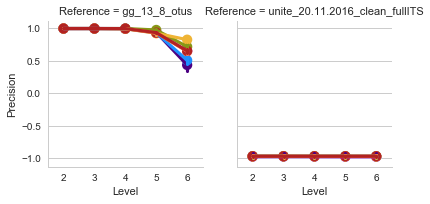

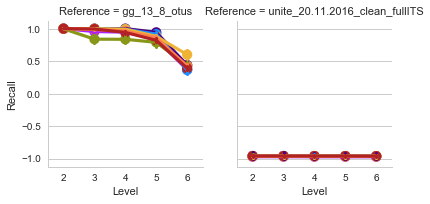

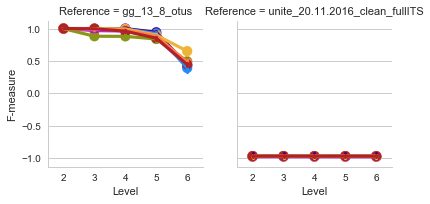

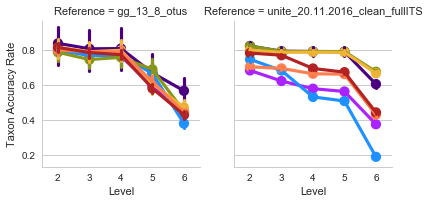

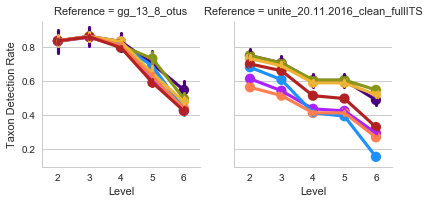

In [10]:
pointplot_from_data_frame(mock_results, "Level", y_vars, 
                          group_by="Reference", color_by="Method",
                          color_pallette=color_pallette, )

### Kruskal-Wallis between-method accuracy comparisons
Kruskal-Wallis FDR-corrected p-values comparing classification methods at each level of taxonomic assignment

In [172]:
result = per_level_kruskal_wallis(mock_results, y_vars, group_by='Method', 
                                  dataset_col='Reference', level_name='Level',
                                  levelrange=range(2,7), alpha=0.05, 
                                  pval_correction='fdr_bh')
result

,Reference,Variable,2,3,4,5,6
0,gg_13_8_otus,Precision,1.077059e-02,9.455196e-02,2.558814e-01,1.905525e-03,1.022860e-02
1,gg_13_8_otus,Recall,6.293206e-28,9.844389e-15,7.991753e-23,1.486565e-17,4.265048e-05
2,gg_13_8_otus,F-measure,2.320716e-01,5.350801e-01,9.777715e-01,1.336838e-06,1.905525e-03
3,gg_13_8_otus,Taxon Accuracy Rate,6.959912e-06,8.134356e-02,5.010372e-03,2.476416e-23,7.578604e-16
4,gg_13_8_otus,Taxon Detection Rate,9.584542e-01,8.763574e-01,5.649290e-07,5.948615e-47,4.774055e-32
5,unite_20.11.2016_clean_fullITS,Precision,4.601516e-28,1.930879e-29,1.067839e-30,7.536402e-53,1.084495e-132
6,unite_20.11.2016_clean_fullITS,Recall,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,unite_20.11.2016_clean_fullITS,F-measure,2.173682e-55,2.073542e-69,5.405091e-54,2.663020e-66,7.336023e-112
8,unite_20.11.2016_clean_fullITS,Taxon Accuracy Rate,4.384513e-265,2.122026e-308,4.685986e-305,9.104506e-280,0.000000e+00
9,unite_20.11.2016_clean_fullITS,Taxon Detection Rate,2.337681e-127,2.204186e-218,4.205315e-228,2.371274e-235,0.000000e+00


### Heatmaps of per-level accuracy
Heatmaps show the performance of individual method/parameter combinations at each taxonomic level, in each reference database (i.e., for bacterial and fungal mock communities individually).

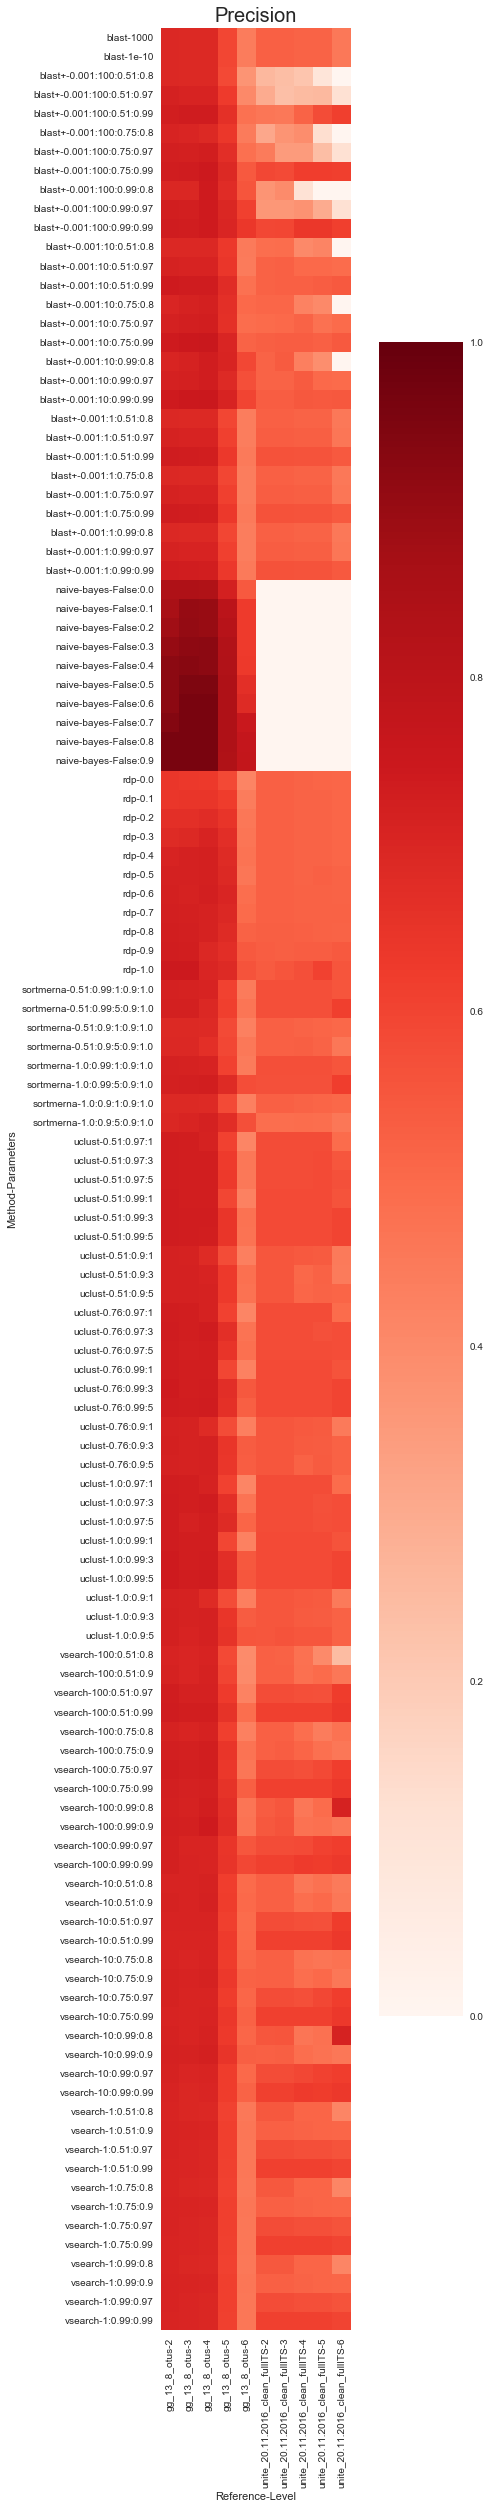

In [8]:
heatmap_from_data_frame(mock_results, metric="Precision", rows=["Method", "Parameters"], cols=["Reference", "Level"])

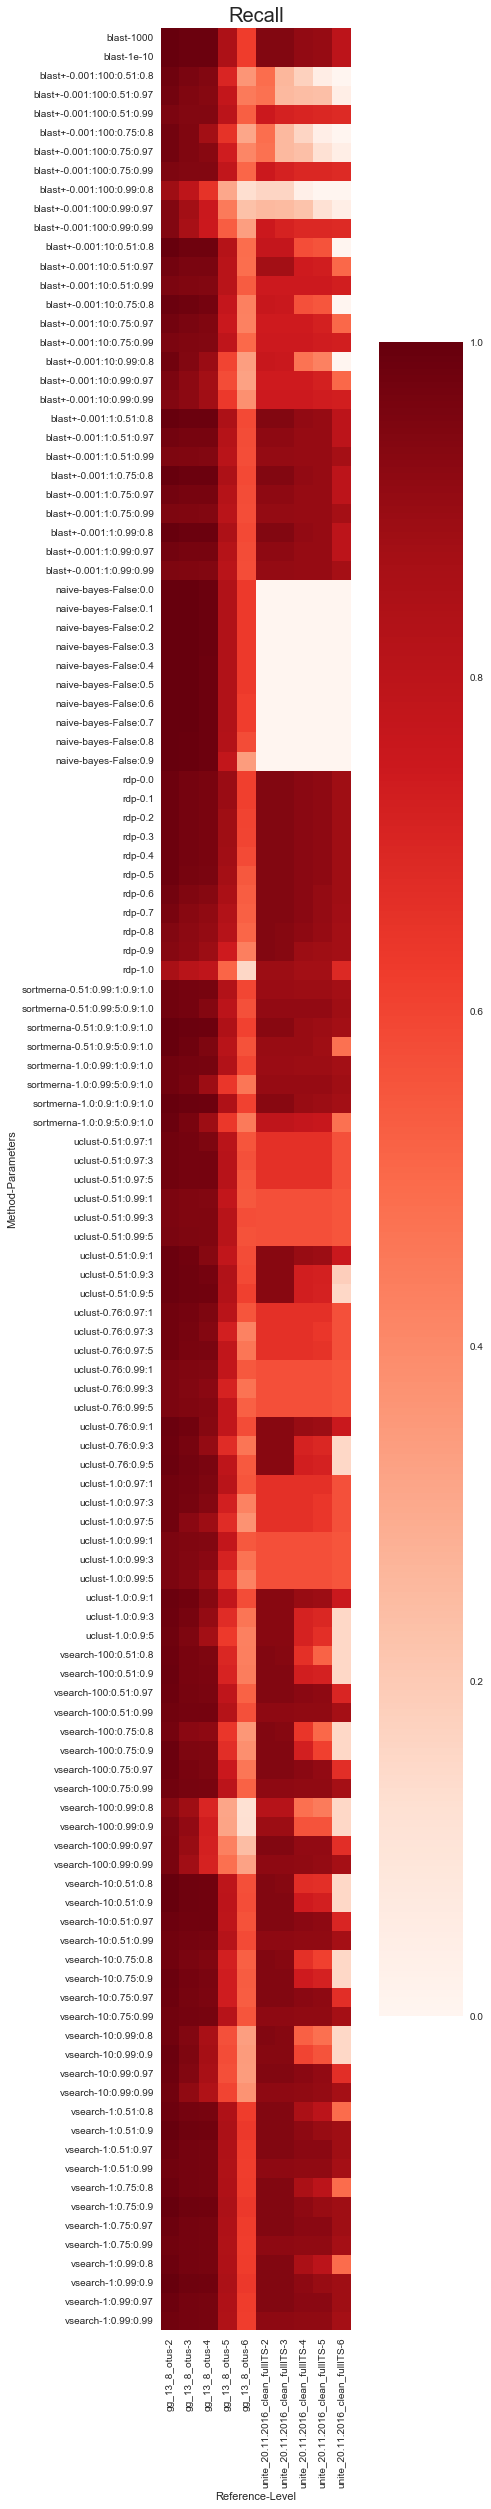

In [9]:
heatmap_from_data_frame(mock_results, metric="Recall", rows=["Method", "Parameters"], cols=["Reference", "Level"])

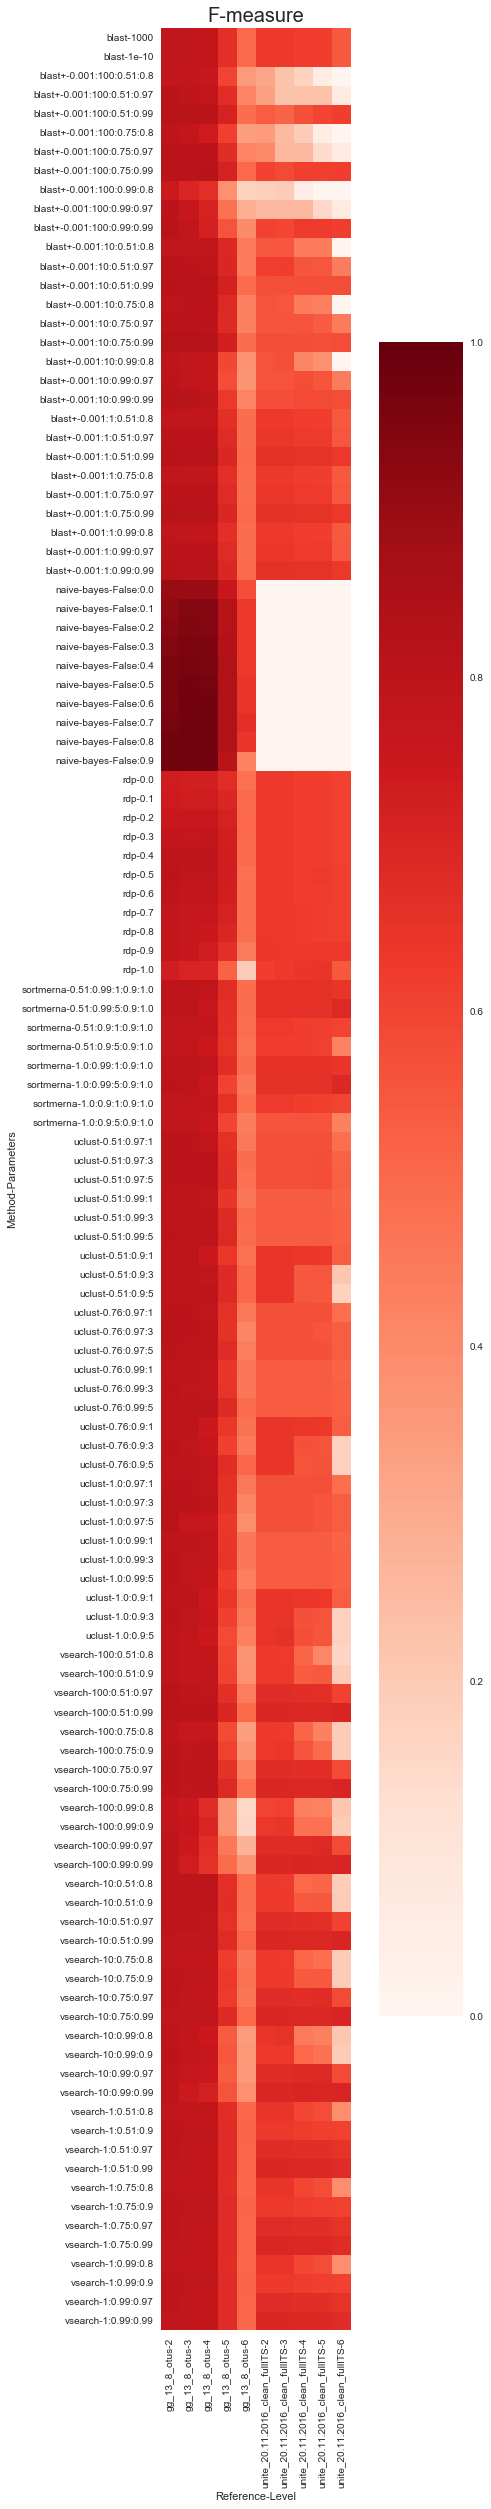

In [10]:
heatmap_from_data_frame(mock_results, metric="F-measure", rows=["Method", "Parameters"], cols=["Reference", "Level"])

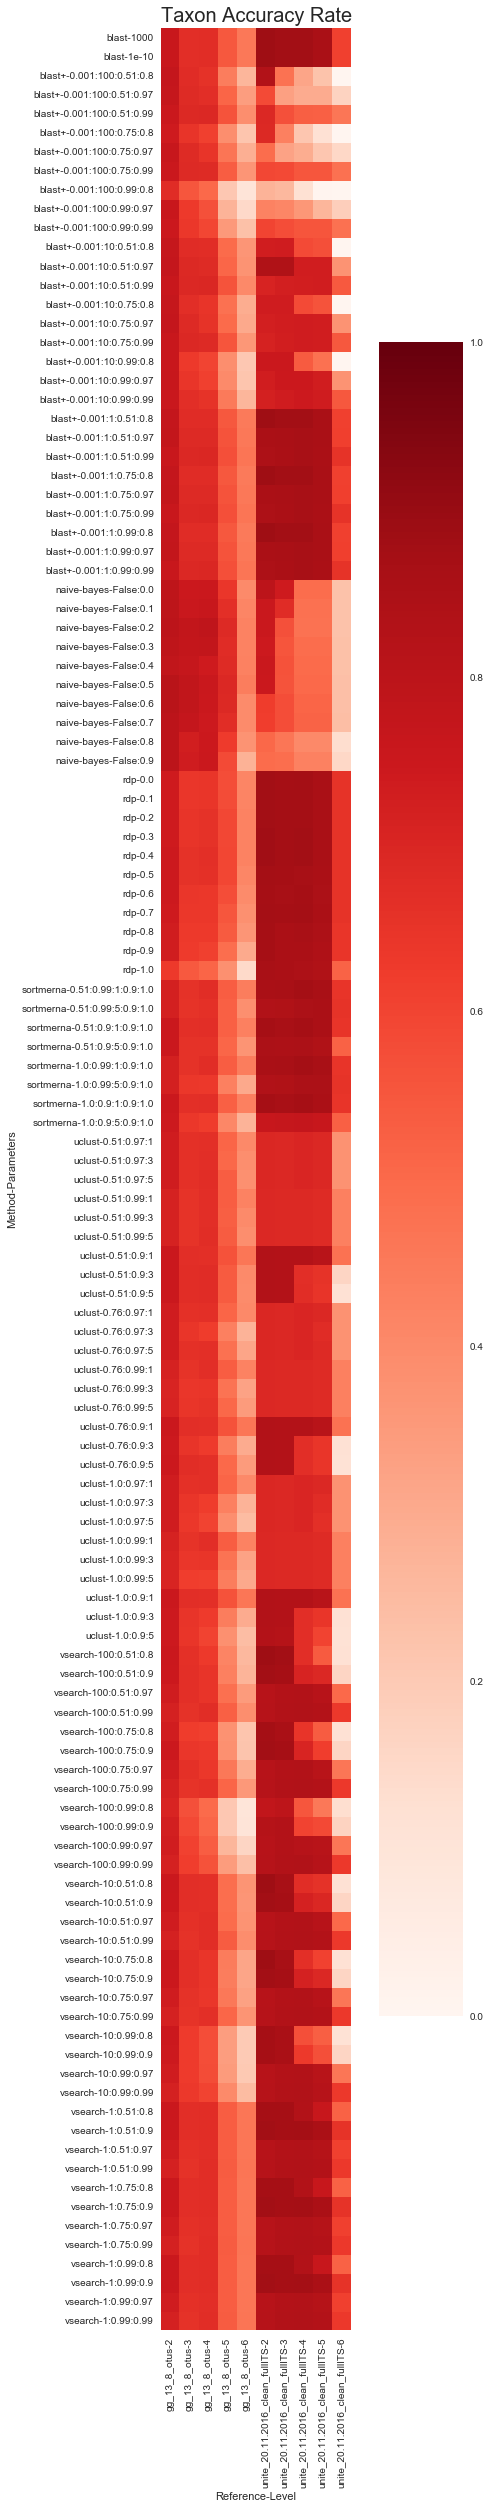

In [11]:
heatmap_from_data_frame(mock_results, metric="Taxon Accuracy Rate", rows=["Method", "Parameters"], cols=["Reference", "Level"])

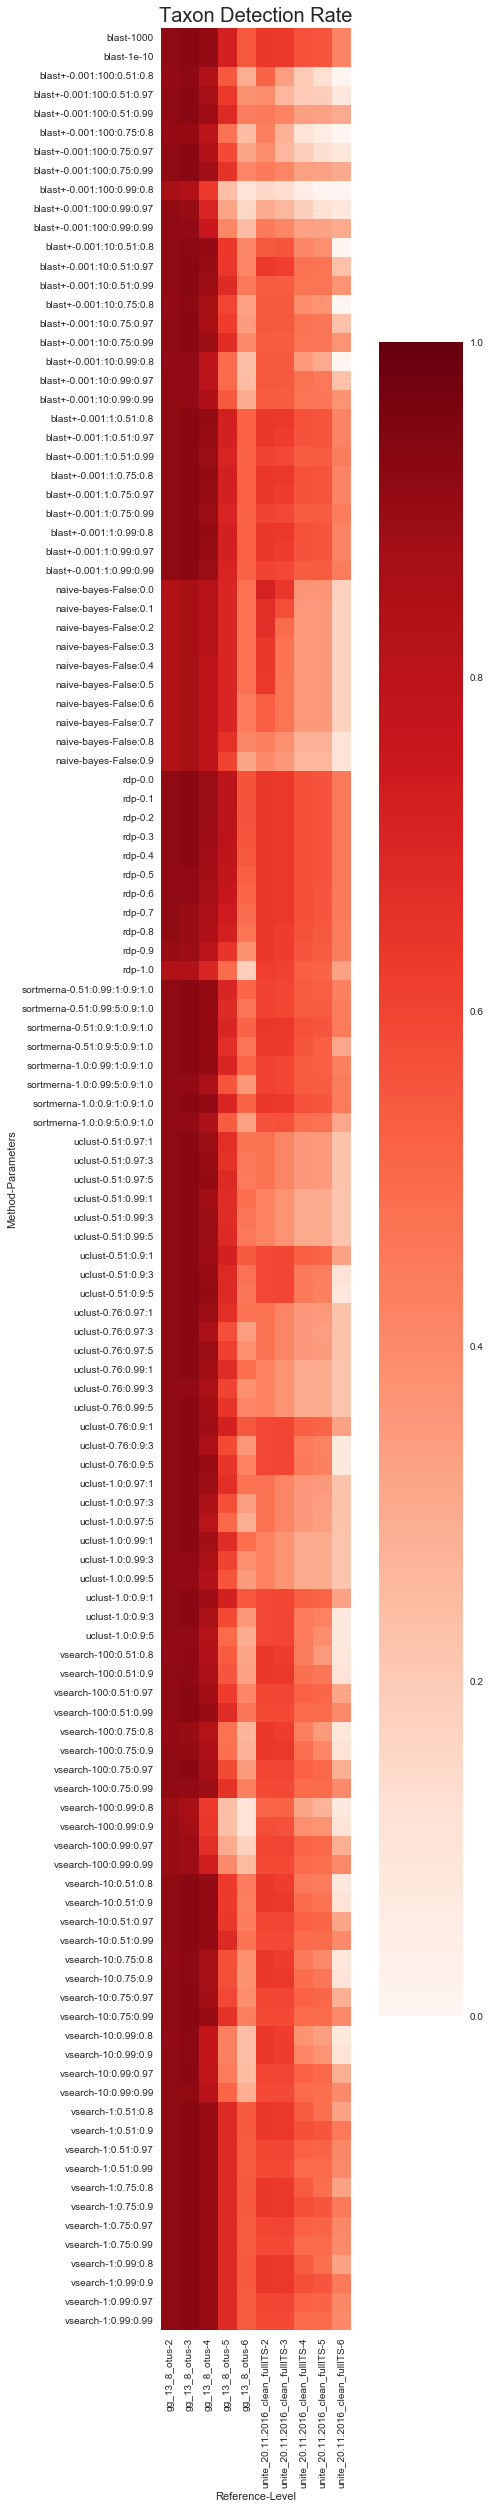

In [12]:
heatmap_from_data_frame(mock_results, metric="Taxon Detection Rate", rows=["Method", "Parameters"], cols=["Reference", "Level"])

Now we will focus on results at species level (for genus level, change to level 5)

In [13]:
mock_results_6 = mock_results[mock_results['Level'] == 6]

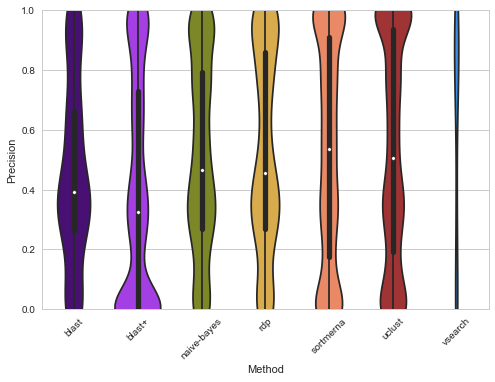

In [14]:
boxplot_from_data_frame(mock_results_6, group_by="Method", metric="Precision", color_pallette=color_pallette)

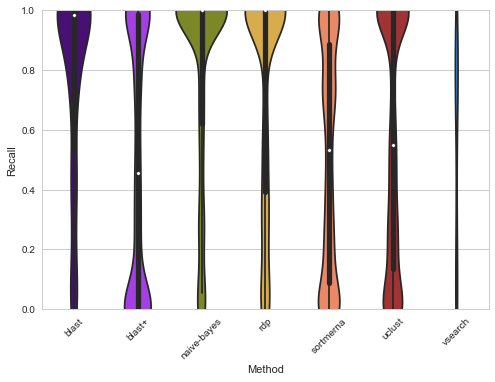

In [15]:
boxplot_from_data_frame(mock_results_6, group_by="Method", metric="Recall", color_pallette=color_pallette)

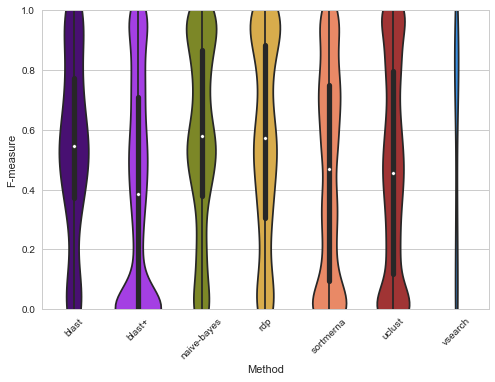

In [16]:
boxplot_from_data_frame(mock_results_6, group_by="Method", metric="F-measure", color_pallette=color_pallette)

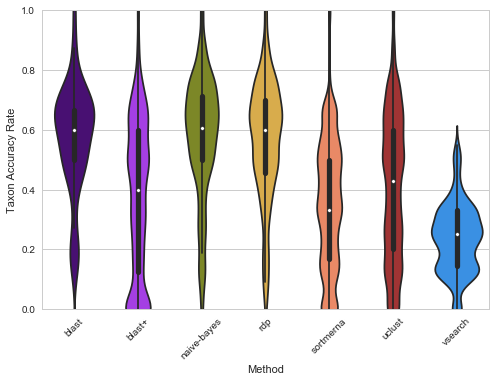

In [17]:
boxplot_from_data_frame(mock_results_6, group_by="Method", metric="Taxon Accuracy Rate", color_pallette=color_pallette)

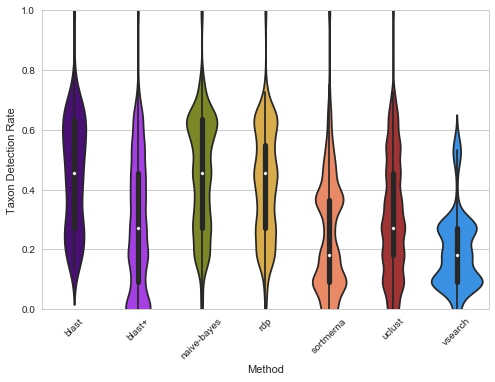

In [18]:
boxplot_from_data_frame(mock_results_6, group_by="Method", metric="Taxon Detection Rate", color_pallette=color_pallette)

In the following heatmaps, we assess accuracy rates in each dataset X method configuration combination. This allows us to assess how evenly configurations affect performance, whether specific mock communities outperform of underperform relative to others, and generally assess how increasing/decreasing specific parameters affects accuracy.

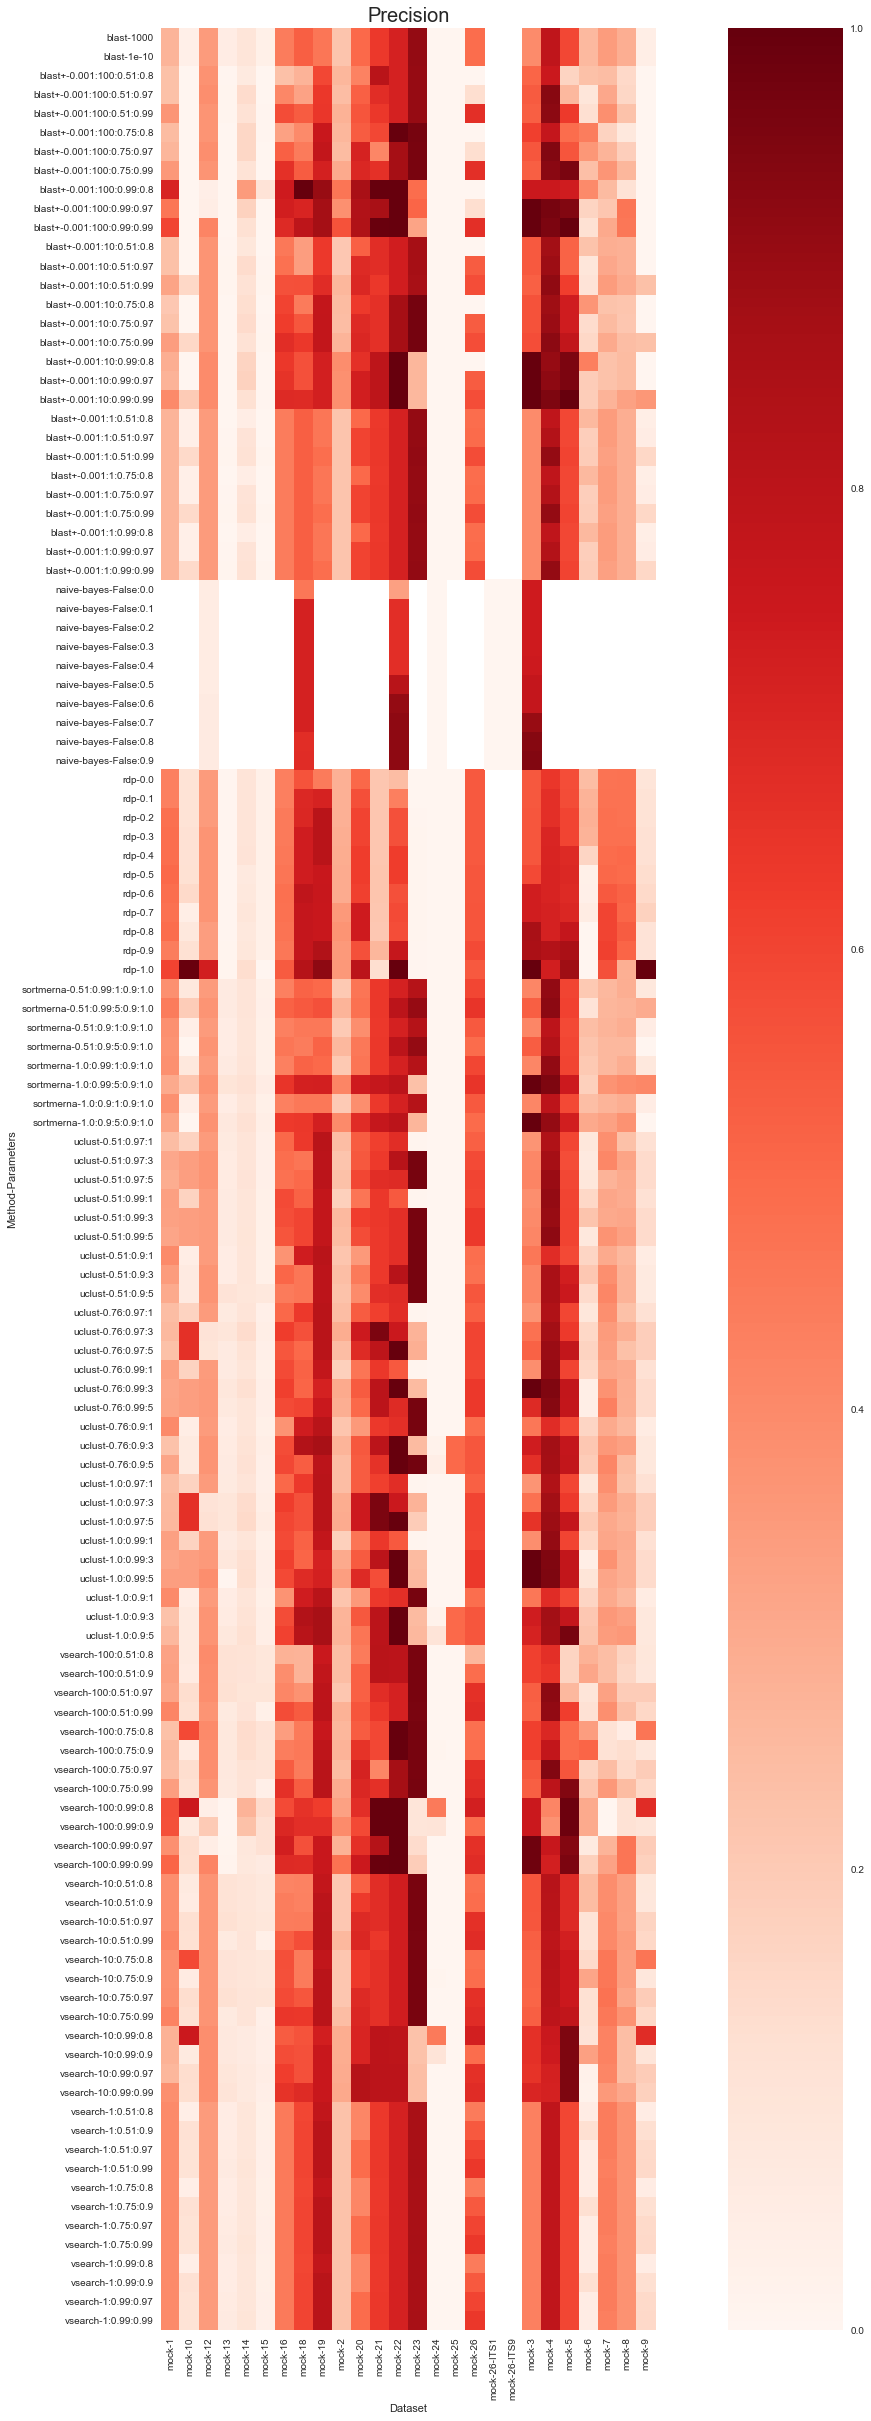

In [19]:
heatmap_from_data_frame(mock_results_6, "Precision")

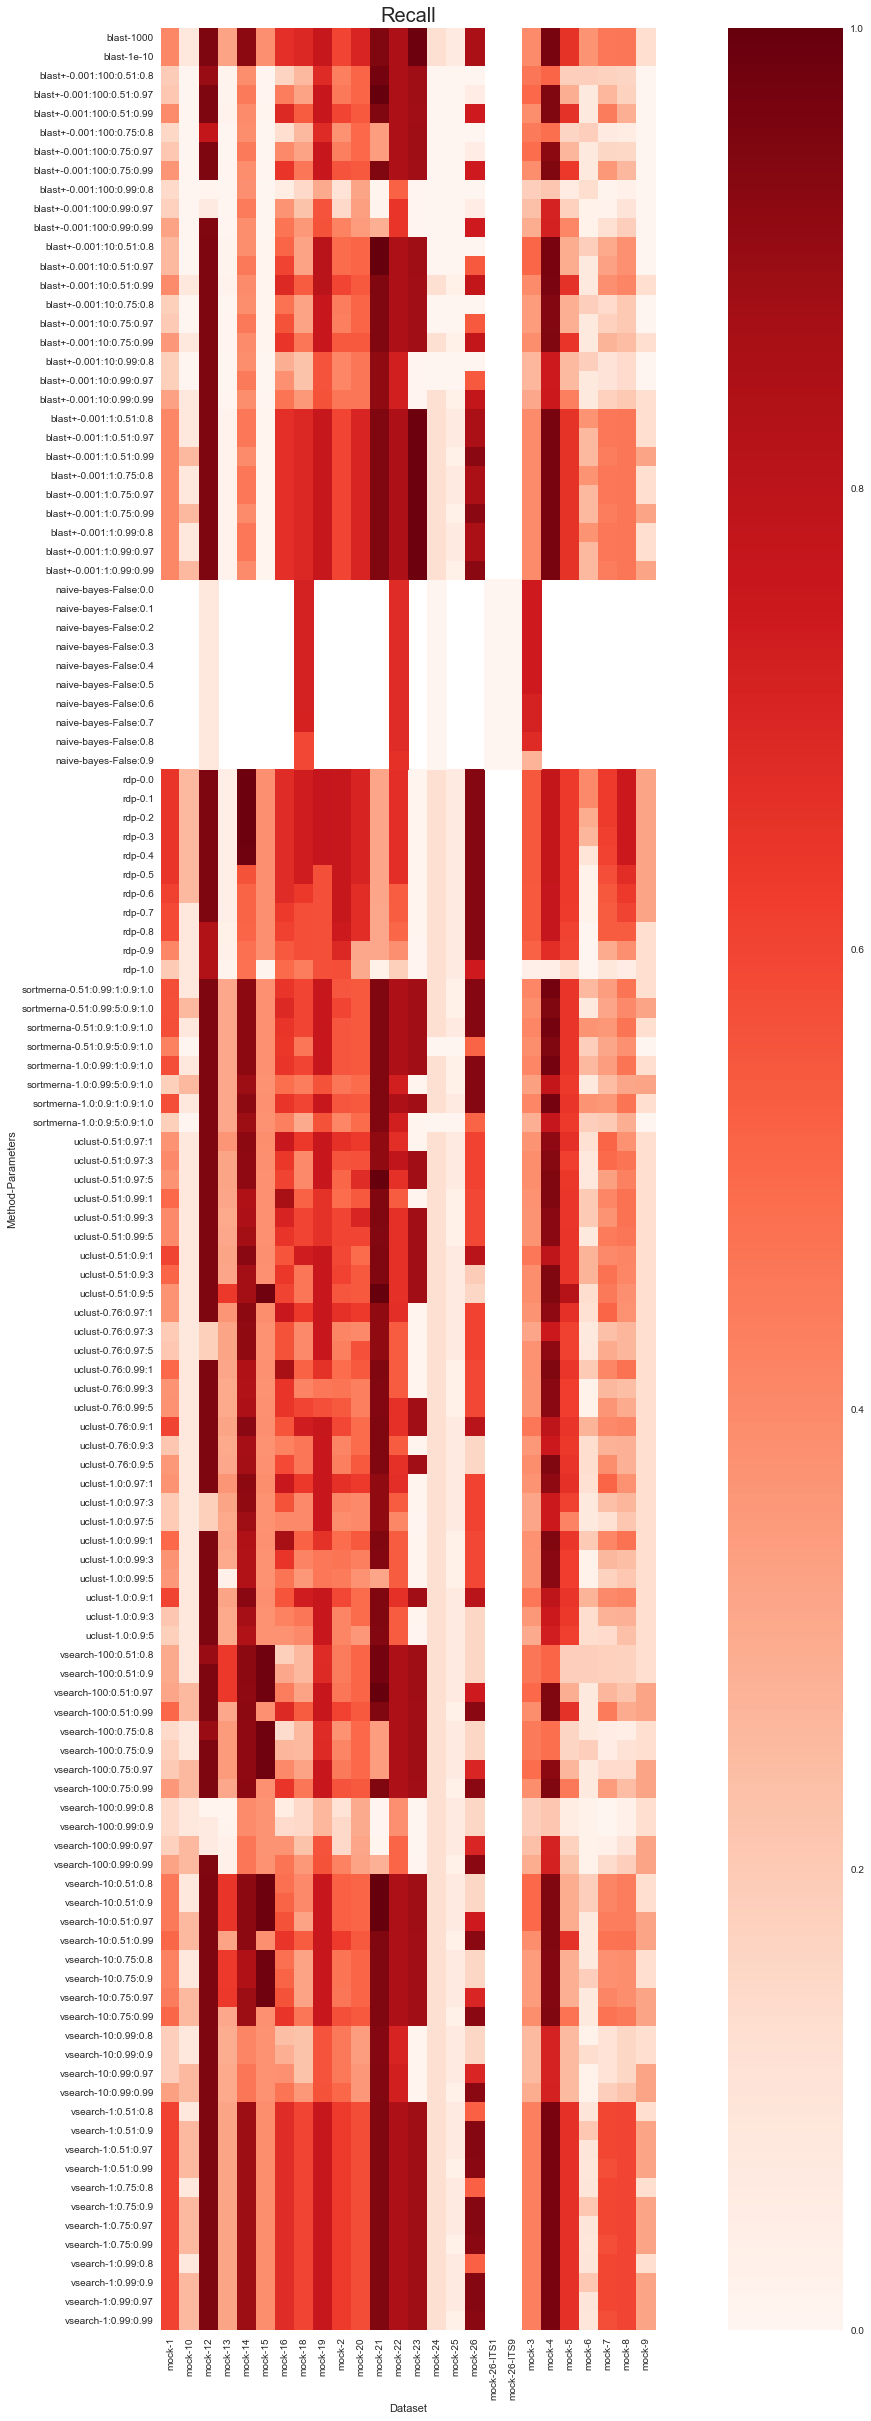

In [20]:
heatmap_from_data_frame(mock_results_6, "Recall")

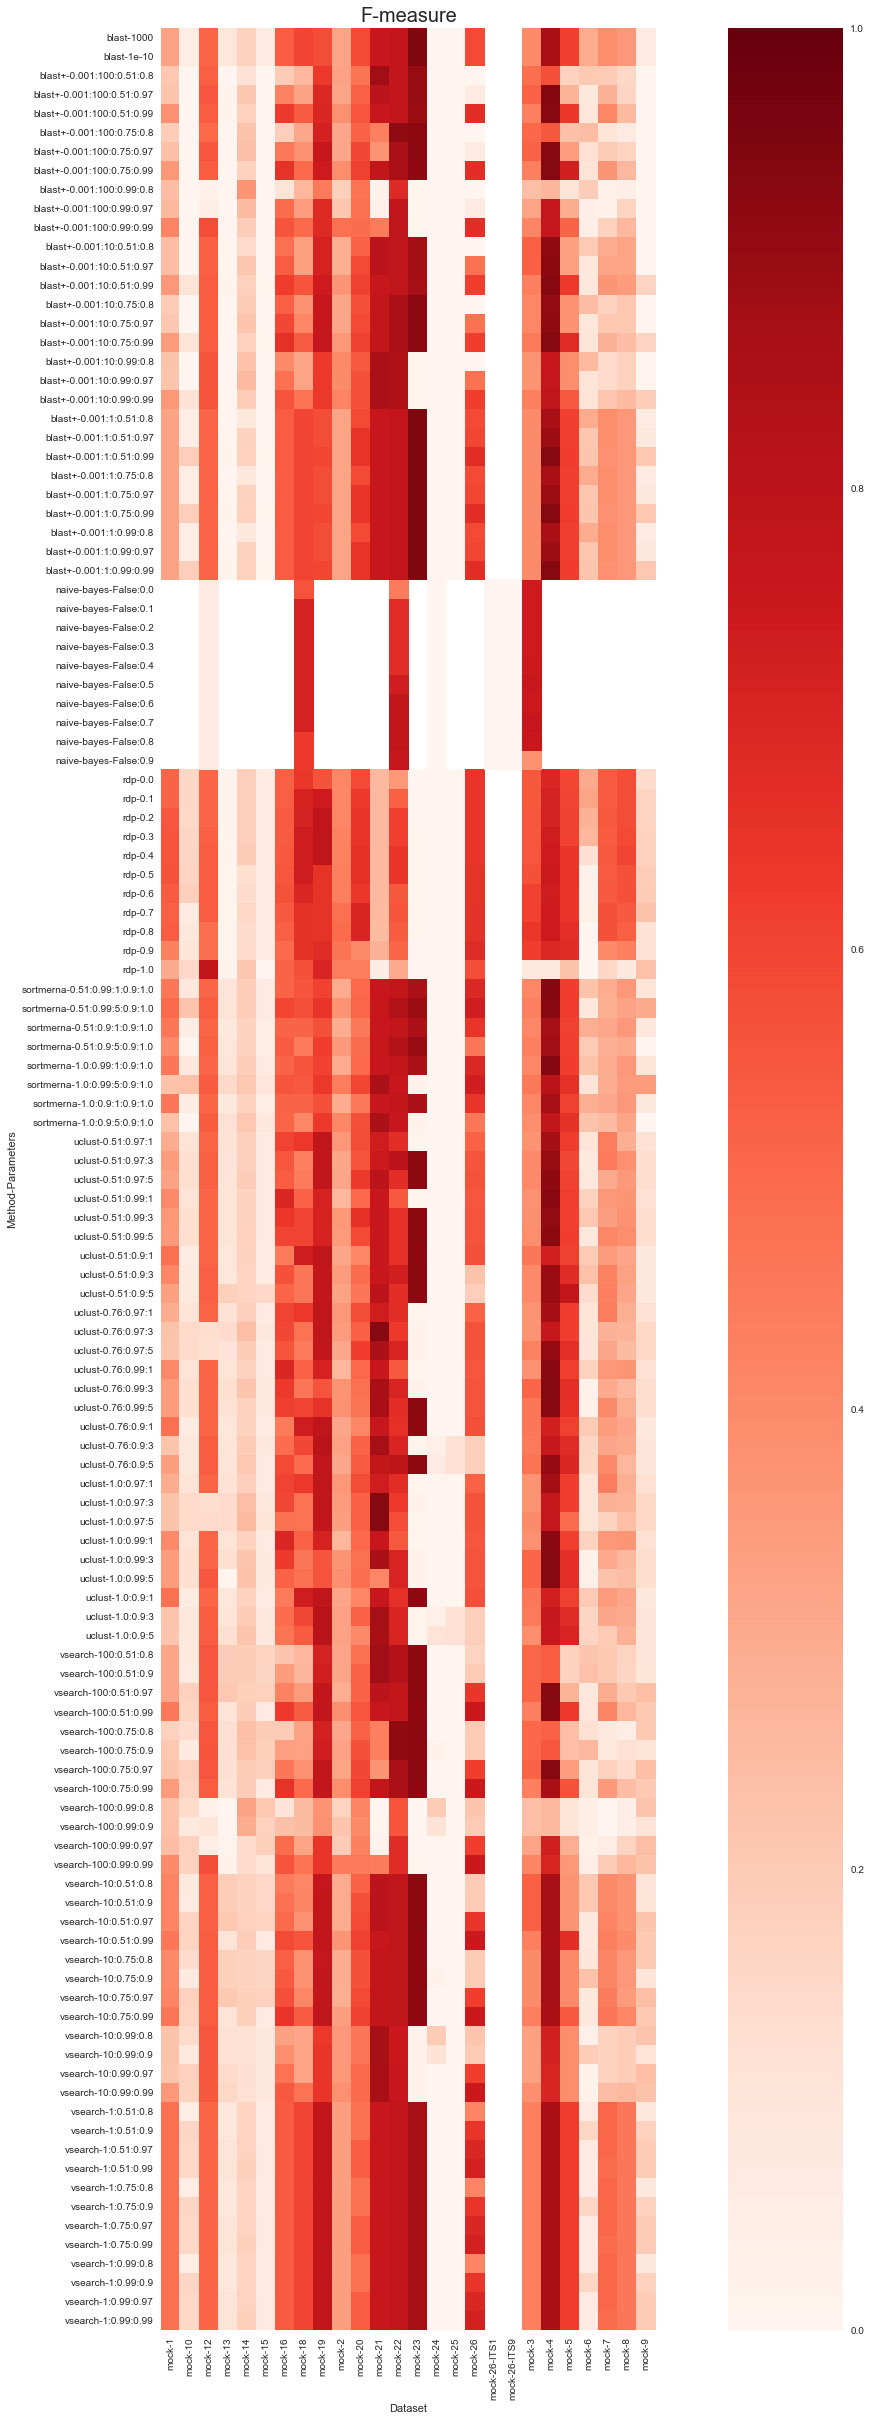

In [21]:
heatmap_from_data_frame(mock_results_6, "F-measure")

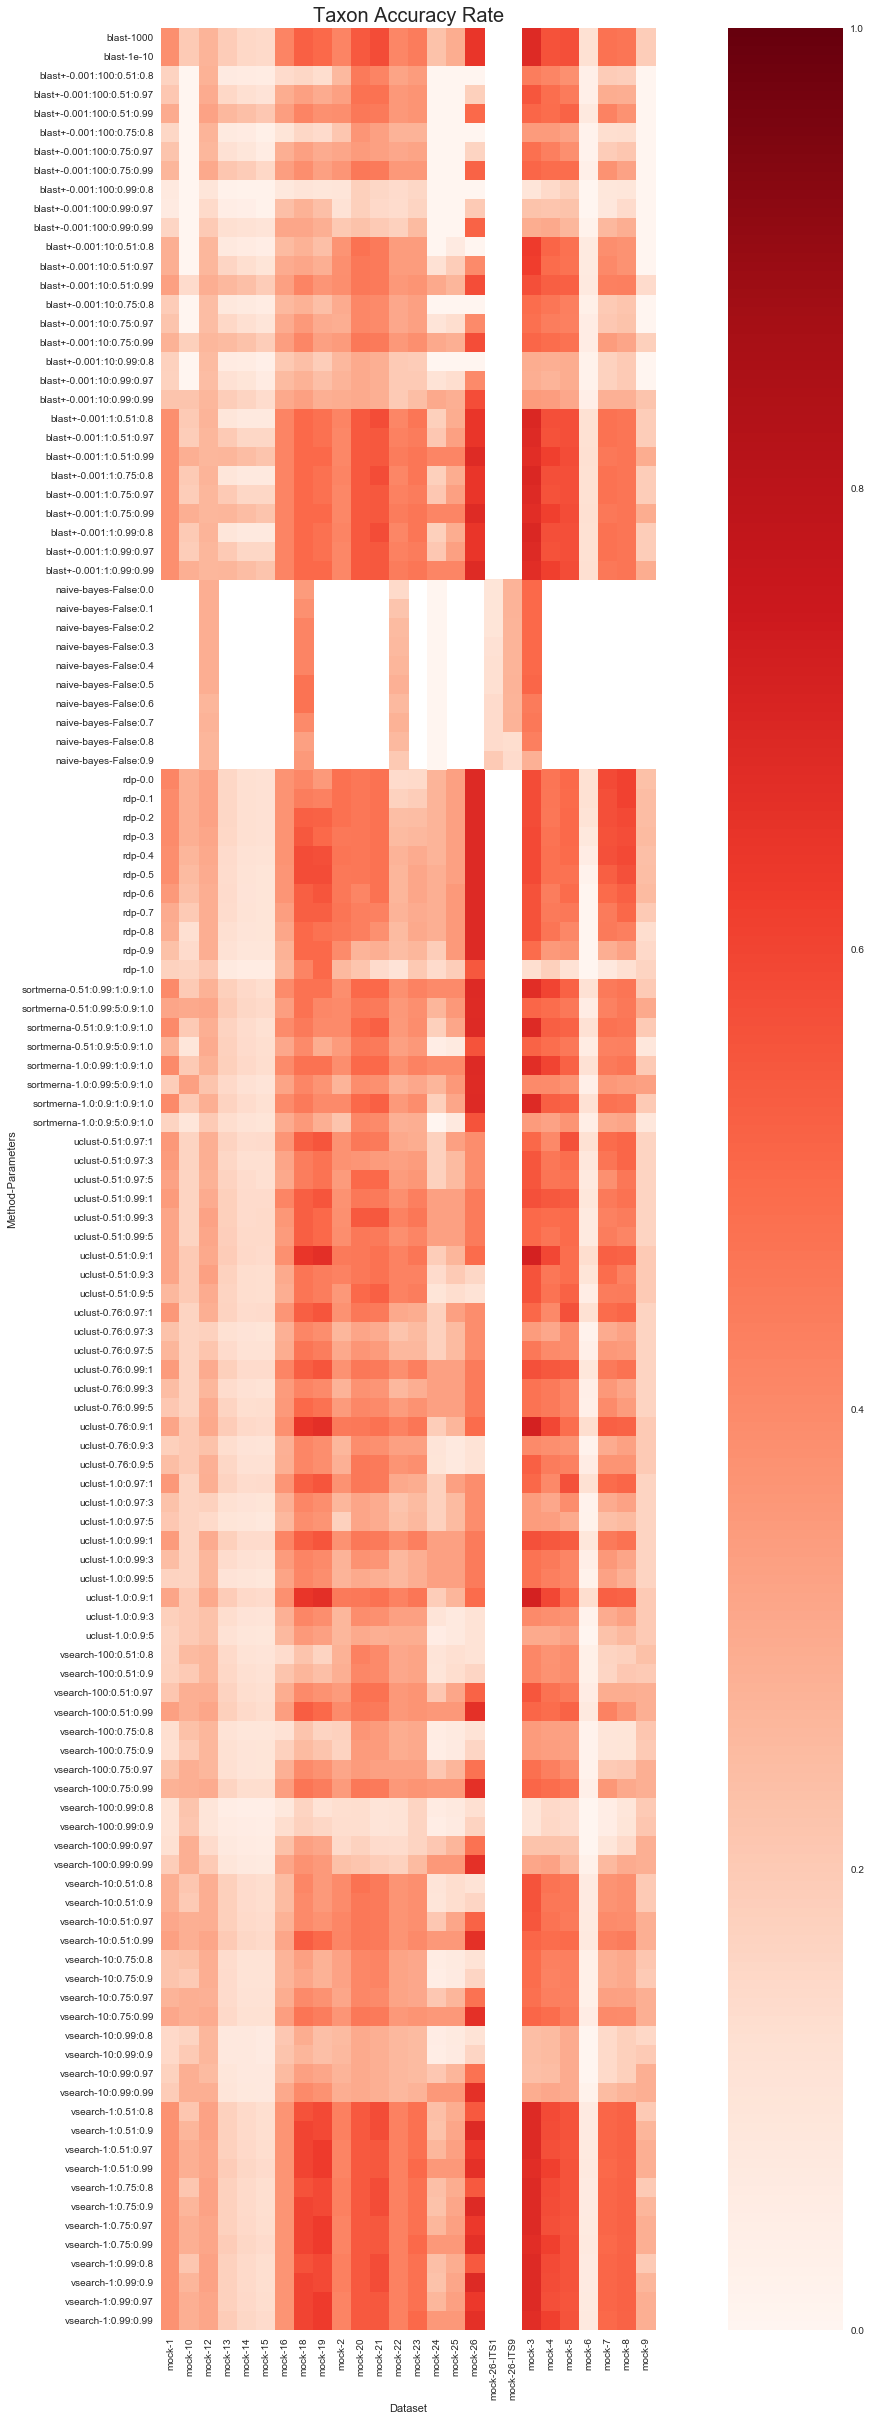

In [22]:
heatmap_from_data_frame(mock_results_6, "Taxon Accuracy Rate")

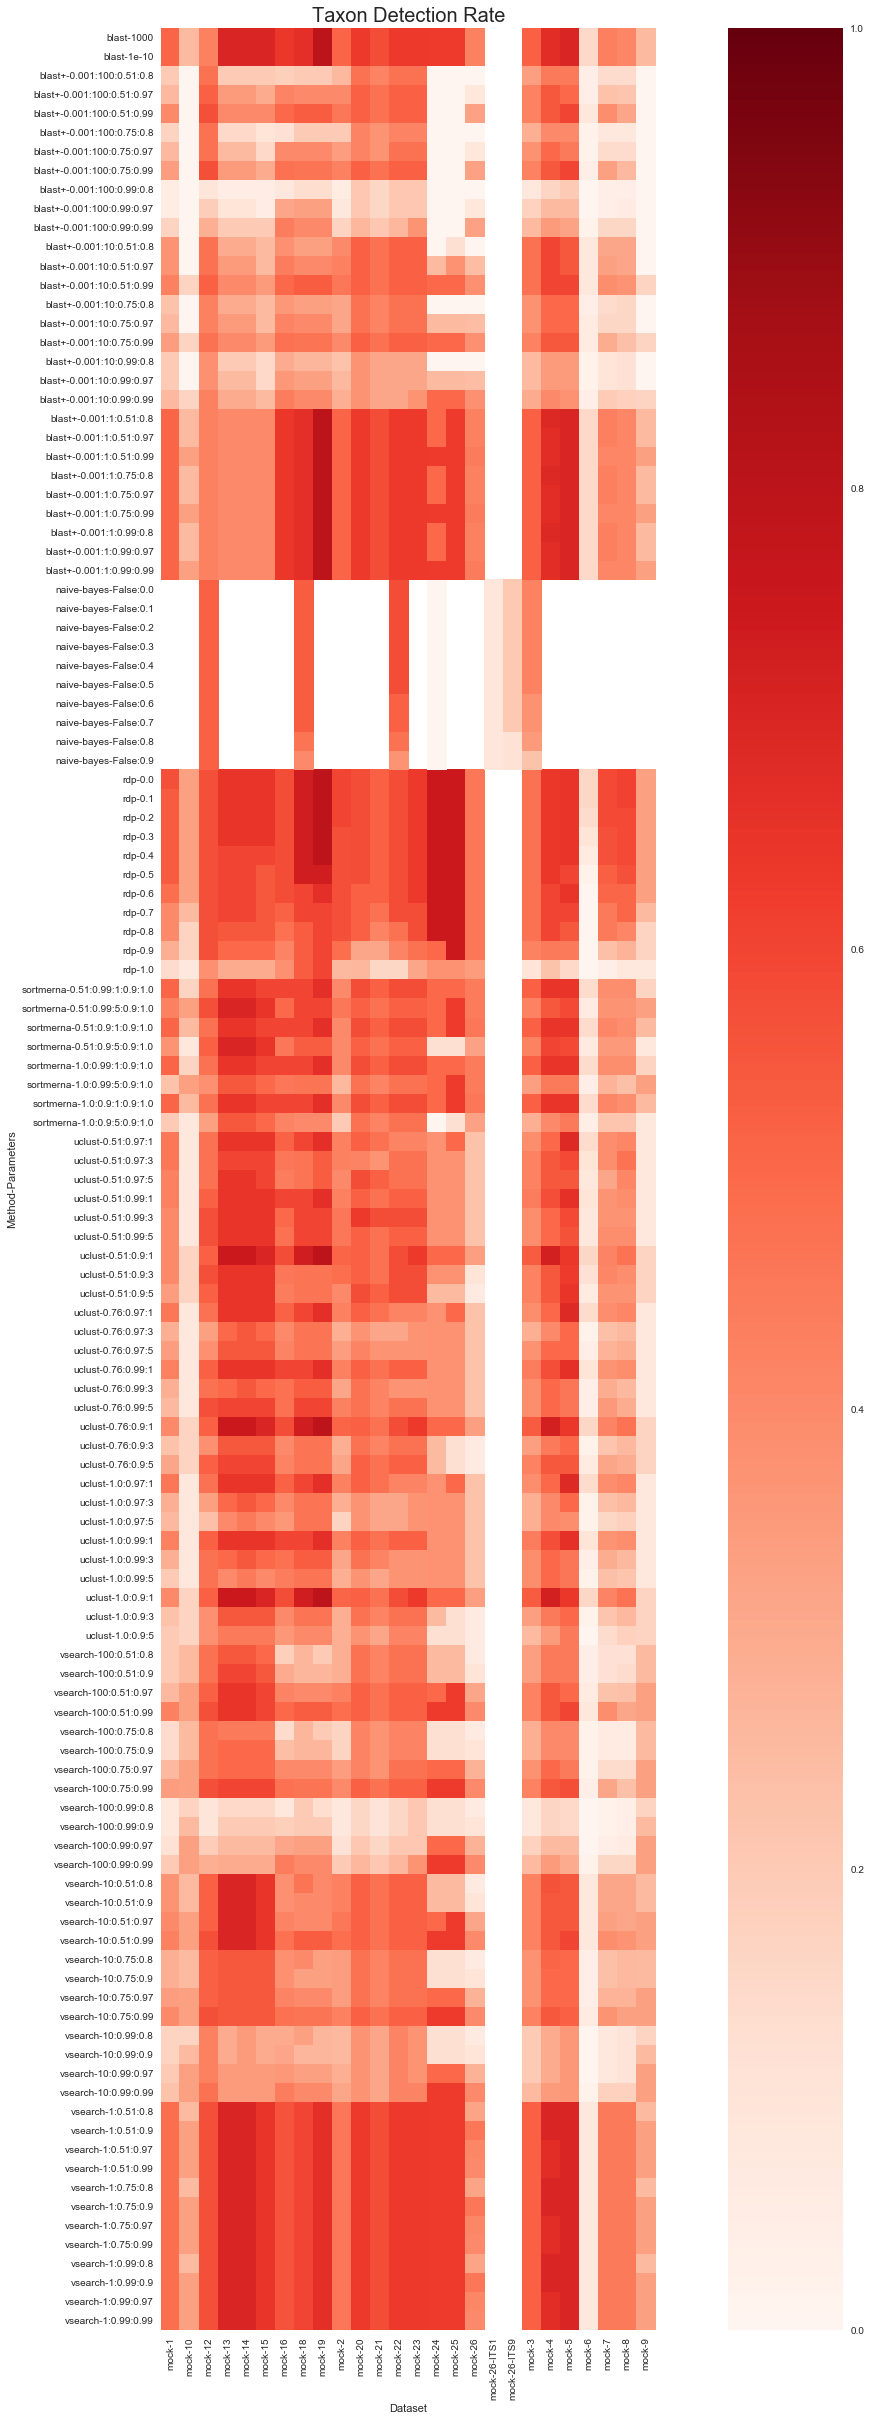

In [23]:
heatmap_from_data_frame(mock_results_6, "Taxon Detection Rate")

### Method Optimization
Which method/parameter configuration performed "best" for a given score? We can rank the top-performing configuration by dataset, method, and taxonomic level.

First, the top-performing method/configuration combination by dataset.

In [24]:
for i in [n for n in range(1,27)]:
    display(Markdown('## mock-{0}'.format(i)))
    best = method_by_dataset_a1(mock_results_6, 'mock-{0}'.format(i))
    display(best)

## mock-1

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
184,rdp,0.5,0.500637,0.648823,0.565178,0.387755,0.542857
229,sortmerna,0.51:0.99:5:0.9:1.0,0.443959,0.572012,0.499915,0.319149,0.428571
389,vsearch,1:0.51:0.8,0.401430,0.606067,0.482966,0.377778,0.485714
344,uclust,1.0:0.9:1,0.400051,0.603986,0.481308,0.318182,0.400000
144,blast+,0.001:100:0.99:0.99,0.598717,0.324745,0.421090,0.162162,0.171429
4,blast,1000,0.271153,0.409379,0.326228,0.382979,0.514286


## mock-2

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
11394,rdp,0.8,0.367900,0.745502,0.492670,0.454545,0.571429
11339,blast+,0.001:100:0.99:0.99,0.565159,0.422615,0.483602,0.206897,0.171429
11759,vsearch,100:0.99:0.99,0.476179,0.422615,0.447801,0.233333,0.200000
11444,sortmerna,1.0:0.99:5:0.9:1.0,0.417094,0.461353,0.438109,0.272727,0.257143
11579,uclust,1.0:0.99:5,0.339513,0.446908,0.385878,0.270270,0.285714
11199,blast,1000,0.220794,0.600973,0.322942,0.418605,0.514286


## mock-3

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
70829,rdp,0.8,0.997743,0.920044,0.957320,0.571429,0.40
71409,uclust,1.0:0.9:1,0.917853,0.917853,0.917853,0.769231,0.50
2958,naive-bayes,False:0.7,0.948451,0.884082,0.915136,0.384615,0.25
71827,vsearch,10:0.51:0.8,0.934408,0.849091,0.889708,0.611111,0.55
70287,blast+,0.001:10:0.51:0.97,0.906703,0.849399,0.877116,0.631579,0.60
71029,sortmerna,1.0:0.99:5:0.9:1.0,1.000000,0.759584,0.863368,0.428571,0.30
70049,blast,1000,0.782694,0.782694,0.782694,0.692308,0.45


## mock-4

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
80469,uclust,1.0:0.99:5,0.999893,0.985770,0.992781,0.416667,0.50
79449,blast+,0.001:100:0.75:0.99,0.985456,0.985779,0.985617,0.478261,0.55
79849,sortmerna,0.51:0.99:5:0.9:1.0,0.983951,0.985779,0.984864,0.478261,0.55
81029,vsearch,100:0.51:0.99,0.983318,0.985779,0.984547,0.478261,0.55
78949,blast,1000,0.937683,0.987258,0.961832,0.560000,0.70
79729,rdp,0.8,0.955103,0.942600,0.948810,0.444444,0.60


## mock-5

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
83908,blast+,0.001:100:0.75:0.99,0.996905,0.985240,0.991038,0.461538,0.60
84388,sortmerna,1.0:0.99:5:0.9:1.0,0.998903,0.981863,0.990310,0.346154,0.45
84728,uclust,0.76:0.99:3,0.982236,0.971837,0.977009,0.375000,0.45
85568,vsearch,100:0.75:0.99,0.956844,0.985235,0.970832,0.444444,0.60
84168,rdp,0.7,0.938948,0.982358,0.960163,0.413793,0.60
83408,blast,1000,0.930951,0.986059,0.957713,0.518519,0.70


## mock-6

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
88254,blast+,0.001:100:0.99:0.8,0.705867,0.340212,0.459133,0.000000,0.000000
89334,vsearch,10:0.99:0.9,0.680830,0.340212,0.453706,0.000000,0.000000
87879,blast,1e-10,0.385701,0.513256,0.440429,0.122807,0.137255
88914,uclust,1.0:0.9:5,0.568189,0.340212,0.425594,0.000000,0.000000
88554,sortmerna,1.0:0.9:1:0.9:1.0,0.341166,0.513256,0.409881,0.135593,0.156863
88343,rdp,0.1,0.358370,0.469739,0.406565,0.131148,0.156863


## mock-7

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
91794,rdp,0.8,0.655133,0.615703,0.634806,0.450980,0.450980
92019,uclust,0.51:0.97:3,0.497448,0.615444,0.550191,0.476190,0.392157
92392,vsearch,1:0.51:0.97,0.482378,0.630615,0.546625,0.522727,0.450980
91539,blast+,0.001:100:0.51:0.99,0.447216,0.507685,0.475536,0.425532,0.392157
91224,blast,1e-10,0.396953,0.524561,0.451922,0.478261,0.431373
91942,sortmerna,1.0:0.99:5:0.9:1.0,0.441069,0.289279,0.349400,0.358974,0.274510


## mock-8

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
95077,rdp,0.4,0.573505,0.745691,0.648361,0.600000,0.588235
95754,vsearch,1:0.51:0.99,0.373619,0.697341,0.486554,0.500000,0.450980
95289,sortmerna,1.0:0.99:5:0.9:1.0,0.417726,0.416783,0.417254,0.333333,0.235294
95364,uclust,0.51:0.97:3,0.328308,0.571351,0.417000,0.489796,0.470588
94657,blast+,0.001:1:0.75:0.99,0.326068,0.450948,0.378473,0.477273,0.411765
94567,blast,1e-10,0.326068,0.450948,0.378473,0.477273,0.411765


## mock-9

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
101453,sortmerna,1.0:0.99:5:0.9:1.0,0.341004,0.438953,0.383828,0.333333,0.333333
101333,rdp,1.0,1.000000,0.169558,0.289952,0.166667,0.083333
102143,vsearch,10:0.75:0.97,0.198578,0.438953,0.273450,0.285714,0.333333
100823,blast+,0.001:1:0.99:0.99,0.190186,0.438953,0.265387,0.285714,0.333333
101663,uclust,0.76:0.97:3,0.183786,0.169558,0.176385,0.166667,0.083333
100673,blast,1000,0.047142,0.169558,0.073773,0.187500,0.250000


## mock-10

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
4684,sortmerna,1.0:0.99:5:0.9:1.0,0.216660,0.293562,0.249316,0.333333,0.333333
4009,blast+,0.001:1:0.75:0.99,0.161682,0.293562,0.208520,0.285714,0.333333
4504,rdp,0.6,0.160259,0.293562,0.207333,0.235294,0.333333
5554,vsearch,100:0.75:0.97,0.146375,0.293562,0.195346,0.285714,0.333333
4909,uclust,0.76:0.97:5,0.640304,0.086631,0.152615,0.166667,0.083333
3919,blast,1e-10,0.036189,0.086631,0.051052,0.200000,0.250000


## mock-11

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate


## mock-12

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
5829,rdp,1.0,0.727667,0.836207,0.778171,0.210526,0.380952
5774,blast+,0.001:100:0.99:0.99,0.419645,0.949025,0.581957,0.200000,0.285714
6184,vsearch,100:0.99:0.99,0.419625,0.949025,0.581938,0.200000,0.285714
6004,uclust,1.0:0.99:5,0.389634,0.950261,0.552661,0.263158,0.476190
5859,sortmerna,1.0:0.9:5:0.9:1.0,0.376056,0.950144,0.538844,0.200000,0.333333
5634,blast,1000,0.351361,0.950283,0.513032,0.272727,0.428571
44,naive-bayes,False:0.8,0.064226,0.075528,0.069420,0.268293,0.523810


## mock-13

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
6704,vsearch,100:0.51:0.97,0.124828,0.635120,0.208648,0.168831,0.65
6449,uclust,0.51:0.9:5,0.107301,0.632968,0.183495,0.166667,0.65
6434,sortmerna,1.0:0.99:5:0.9:1.0,0.100602,0.309102,0.151799,0.150685,0.55
6194,blast,1e-10,0.054489,0.324442,0.093308,0.194444,0.70
6389,rdp,0.9,0.008395,0.028443,0.012964,0.113636,0.50
6254,blast+,0.001:10:0.51:0.99,0.009537,0.018664,0.012624,0.258065,0.40


## mock-14

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
7434,blast+,0.001:100:0.99:0.8,0.350567,0.385153,0.367047,0.023256,0.05
7849,vsearch,100:0.99:0.8,0.276314,0.394944,0.325146,0.041667,0.15
7669,uclust,1.0:0.97:5,0.147633,0.884556,0.253034,0.090909,0.45
7509,rdp,1.0,0.135452,0.480162,0.211298,0.055556,0.30
7539,sortmerna,1.0:0.9:5:0.9:1.0,0.119514,0.888138,0.210678,0.110000,0.55
7309,blast,1e-10,0.096241,0.924470,0.174333,0.155556,0.70


## mock-15

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
8964,vsearch,100:0.99:0.8,0.143235,0.373927,0.207128,0.042254,0.15
8679,uclust,0.51:0.9:5,0.081802,0.984068,0.151049,0.131313,0.65
8664,sortmerna,1.0:0.99:5:0.9:1.0,0.052360,0.378490,0.091994,0.105263,0.50
8619,rdp,0.9,0.033677,0.383126,0.061911,0.091743,0.50
8419,blast,1000,0.031844,0.383373,0.058803,0.145833,0.70
8484,blast+,0.001:10:0.51:0.99,0.010820,0.010185,0.010493,0.194444,0.35


## mock-16

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
9804,uclust,0.51:0.99:1,0.585262,0.865865,0.698434,0.416667,0.60
9614,blast+,0.001:10:0.75:0.99,0.674346,0.649305,0.661589,0.338028,0.48
10064,vsearch,100:0.75:0.99,0.662707,0.649305,0.655937,0.338028,0.48
9749,sortmerna,0.51:0.99:5:0.9:1.0,0.522604,0.690638,0.594984,0.337838,0.50
9709,rdp,0.6,0.483312,0.678995,0.564681,0.367089,0.58
9534,blast,1000,0.443385,0.666355,0.532471,0.421053,0.64


## mock-17

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate


## mock-18

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
10374,uclust,0.76:0.9:1,0.737241,0.737241,0.737241,0.647059,0.733333
10249,rdp,0.3,0.736356,0.737683,0.737019,0.550000,0.733333
84,naive-bayes,False:0.6,0.715650,0.715532,0.715591,0.470588,0.533333
10139,blast+,0.001:1:0.99:0.99,0.529439,0.693341,0.600405,0.500000,0.666667
10089,blast,1000,0.528275,0.693341,0.599656,0.526316,0.666667
10489,vsearch,1:0.75:0.9,0.599513,0.599513,0.599513,0.600000,0.600000
10304,sortmerna,0.51:0.99:5:0.9:1.0,0.546659,0.599513,0.571868,0.473684,0.600000


## mock-19

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
10934,uclust,0.76:0.9:3,0.864750,0.762404,0.810358,0.388889,0.466667
10804,rdp,0.3,0.808117,0.769837,0.788513,0.500000,0.800000
11034,vsearch,1:0.51:0.99,0.806290,0.765852,0.785551,0.625000,0.666667
10724,blast+,0.001:10:0.75:0.99,0.779257,0.760327,0.769675,0.333333,0.466667
10859,sortmerna,0.51:0.99:5:0.9:1.0,0.567321,0.764312,0.651246,0.409091,0.600000
10644,blast,1000,0.464541,0.768226,0.578978,0.500000,0.800000


## mock-20

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
12499,rdp,0.8,0.742185,0.672668,0.705719,0.434783,0.526316
12589,uclust,0.51:0.99:3,0.620663,0.706978,0.661015,0.545455,0.631579
12349,blast+,0.001:1:0.75:0.99,0.602795,0.706942,0.650728,0.545455,0.631579
12784,vsearch,10:0.75:0.99,0.698977,0.545509,0.612780,0.454545,0.526316
12549,sortmerna,1.0:0.99:5:0.9:1.0,0.741255,0.495475,0.593943,0.391304,0.473684
12319,blast,1e-10,0.503361,0.706942,0.588030,0.545455,0.631579


## mock-21

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
13174,uclust,0.76:0.97:3,0.957016,0.914324,0.935183,0.300000,0.315789
13364,vsearch,100:0.51:0.8,0.805034,0.969247,0.879542,0.400000,0.421053
12969,blast+,0.001:100:0.51:0.8,0.804972,0.969247,0.879504,0.421053,0.421053
13104,sortmerna,1.0:0.99:5:0.9:1.0,0.768089,0.946250,0.847912,0.380952,0.421053
12869,blast,1000,0.634651,0.946496,0.759822,0.578947,0.578947
13059,rdp,0.9,0.264257,0.309030,0.284895,0.285714,0.315789


## mock-22

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
13944,vsearch,100:0.75:0.9,0.999306,0.846843,0.916779,0.296296,0.421053
13539,blast+,0.001:100:0.75:0.8,0.999306,0.846843,0.916779,0.275862,0.421053
13639,sortmerna,0.51:0.99:5:0.9:1.0,0.803509,0.847376,0.824860,0.357143,0.526316
13684,uclust,0.51:0.97:3,0.813080,0.786117,0.799371,0.333333,0.473684
139,naive-bayes,False:0.7,0.920041,0.676028,0.779382,0.277778,0.526316
13429,blast,1e-10,0.717904,0.847521,0.777346,0.413793,0.631579
13594,rdp,0.5,0.624070,0.668988,0.645749,0.268293,0.578947


## mock-23

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
13999,blast+,0.001:1:0.51:0.99,0.910438,0.984589,0.946063,0.461538,0.631579
13979,blast,1000,0.909923,0.984589,0.945784,0.444444,0.631579
14274,uclust,0.76:0.9:5,0.975011,0.880078,0.925115,0.384615,0.526316
14494,vsearch,100:0.75:0.8,0.966827,0.883446,0.923257,0.307692,0.421053
14184,sortmerna,0.51:0.9:5:0.9:1.0,0.908365,0.882221,0.895102,0.357143,0.526316
14149,rdp,0.5,0.011434,0.010512,0.010954,0.315789,0.631579


## mock-24

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
15009,vsearch,10:0.99:0.8,0.452830,0.12766,0.199170,0.052632,0.125
14874,uclust,1.0:0.9:5,0.101695,0.12766,0.113208,0.052632,0.125
14769,sortmerna,1.0:0.99:5:0.9:1.0,0.001041,0.12766,0.002065,0.266667,0.500
14614,blast+,0.001:10:0.75:0.99,0.001020,0.12766,0.002024,0.307692,0.500
14729,rdp,1.0,0.000074,0.12766,0.000147,0.142857,0.375
14534,blast,1000,0.000053,0.12766,0.000106,0.227273,0.625
164,naive-bayes,False:0.2,0.000000,0.00000,0.000000,0.000000,0.000


## mock-25

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
15429,uclust,1.0:0.9:5,0.500000,0.067416,0.118812,0.071429,0.125
15624,vsearch,100:0.99:0.8,0.000469,0.067416,0.000932,0.071429,0.125
15284,rdp,1.0,0.000028,0.067416,0.000056,0.187500,0.375
15299,sortmerna,0.51:0.99:1:0.9:1.0,0.000014,0.033708,0.000028,0.400000,0.500
15104,blast+,0.001:1:0.51:0.97,0.000011,0.067416,0.000022,0.333333,0.625
15089,blast,1000,0.000011,0.067416,0.000021,0.294118,0.625


## mock-26

,Method,Parameters,Precision,Recall,F-measure,Taxon Accuracy Rate,Taxon Detection Rate
28306,blast+,0.001:100:0.75:0.99,1.0,1.0,1.0,0.666667,0.181818
39104,sortmerna,1.0:0.99:5:0.9:1.0,1.0,1.0,1.0,0.500000,0.272727
63087,vsearch,10:0.99:0.9,1.0,1.0,1.0,0.250000,0.090909
33698,rdp,0.7,1.0,1.0,1.0,1.000000,1.000000
45948,uclust,0.76:0.97:3,1.0,1.0,1.0,1.000000,1.000000
16547,blast,1e-10,1.0,1.0,1.0,1.000000,1.000000


Now we can determine which parameter configuration performed best for each method. *Count best* values in each column indicate how many samples a given method achieved within one mean absolute deviation of the best result (which is why they may sum to more than the total number of samples).

In [25]:
for method in mock_results_6['Method'].unique():
    top_params = parameter_comparisons(
        mock_results_6, method, 
        metrics=['Precision', 'Recall', 'F-measure',
                 'Taxon Accuracy Rate', 'Taxon Detection Rate'])
    display(Markdown('## {0}'.format(method)))
    display(top_params[:10])

## blast

,F-measure,Precision,Recall,Taxon Accuracy Rate,Taxon Detection Rate
1000,137,137,140,137,140
1e-10,140,140,140,140,140


## blast+

,F-measure,Precision,Recall,Taxon Accuracy Rate,Taxon Detection Rate
0.001:1:0.99:0.99,115,79,135,137.0,137.0
0.001:1:0.99:0.97,101,66,127,132.0,137.0
0.001:1:0.99:0.8,98,61,128,131.0,137.0
0.001:1:0.75:0.99,115,79,135,137.0,137.0
0.001:1:0.75:0.97,101,66,127,132.0,137.0
0.001:1:0.75:0.8,98,61,128,131.0,137.0
0.001:1:0.51:0.99,115,79,135,137.0,137.0
0.001:1:0.51:0.97,101,66,127,132.0,137.0
0.001:1:0.51:0.8,98,61,128,131.0,137.0
0.001:10:0.51:0.99,104,76,112,103.0,108.0


## rdp

,F-measure,Precision,Recall,Taxon Accuracy Rate,Taxon Detection Rate
0.0,74,50,140,135,140
0.1,77,51,140,135,140
0.2,77,51,139,136,140
0.3,78,54,139,138,137
0.4,81,57,137,137,137
0.5,93,68,135,135,136
0.6,93,71,133,132,134
0.7,95,76,128,120,124
0.8,91,78,120,111,115
0.9,99,94,109,100,102


## sortmerna

,F-measure,Precision,Recall,Taxon Accuracy Rate,Taxon Detection Rate
0.51:0.9:1:0.9:1.0,62,37,130,119,136
1.0:0.9:1:0.9:1.0,62,37,130,119,136
0.51:0.99:1:0.9:1.0,86,59,128,125,119
1.0:0.99:1:0.9:1.0,86,59,128,125,119
0.51:0.99:5:0.9:1.0,104,90,130,110,112
1.0:0.99:5:0.9:1.0,112,116,105,96,95
0.51:0.9:5:0.9:1.0,37,44,52,36,47
1.0:0.9:5:0.9:1.0,40,65,33,30,32


## uclust

,F-measure,Precision,Recall,Taxon Accuracy Rate,Taxon Detection Rate
0.51:0.9:1,80,35,124,125,138
1.0:0.9:1,80,35,124,125,138
0.76:0.9:1,80,35,124,125,138
0.51:0.97:1,79,48,89,63,48
1.0:0.97:1,79,48,89,63,48
0.76:0.97:1,79,48,89,63,48
0.51:0.99:1,92,71,87,93,45
1.0:0.99:1,92,71,87,93,45
0.76:0.99:1,92,71,87,93,45
0.51:0.99:3,98,81,87,86,42


## vsearch

,F-measure,Precision,Recall,Taxon Accuracy Rate,Taxon Detection Rate
1:0.75:0.9,101,51,136,139.0,140.0
1:0.51:0.9,101,51,136,139.0,140.0
1:0.99:0.9,101,51,136,139.0,140.0
1:0.51:0.97,109,57,135,135.0,130.0
1:0.99:0.97,109,57,135,135.0,130.0
1:0.75:0.97,109,57,135,135.0,130.0
1:0.75:0.99,110,70,133,135.0,128.0
1:0.51:0.99,110,70,133,135.0,128.0
1:0.99:0.99,110,70,133,135.0,128.0
10:0.51:0.99,120,74,131,125.0,121.0


## naive-bayes

,F-measure,Precision,Recall,Taxon Accuracy Rate,Taxon Detection Rate
False:0.0,55,53,60,46,60
False:0.1,56,54,60,46,60
False:0.2,56,54,60,46,60
False:0.3,56,54,60,47,60
False:0.4,56,54,60,47,60
False:0.5,57,56,60,48,60
False:0.6,59,57,59,43,55
False:0.7,60,58,59,43,55
False:0.8,58,60,58,4,14
False:0.9,55,59,53,13,14


## Optimized method performance
And, finally, which method performed best at each individual taxonomic level for each reference dataset (i.e., for across all fungal and bacterial mock communities combined)?

For this analysis, we rank the top-performing method/parameter combination for each method at family through species levels. Methods are ranked by top F-measure, and the average value for each metric is shown (rather than count best as above). F-measure distributions are plotted for each method, and compared using paired t-tests with FDR-corrected P-values. This cell does not need to be altered, unless if you wish to change the *metric* used for sorting best methods and for plotting.

## gg_13_8_otus level 4

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
2,naive-bayes,False:0.9,0.750974,0.789542,0.964681,0.986550,0.973344
1,blast+,0.001:10:0.75:0.99,0.686957,0.887050,0.753998,0.942188,0.820880
6,vsearch,100:0.51:0.99,0.673609,0.901756,0.729464,0.969096,0.799002
5,uclust,0.51:0.97:3,0.670833,0.898296,0.728687,0.969664,0.797892
3,rdp,0.4,0.664497,0.880995,0.719361,0.963950,0.789074
4,sortmerna,0.51:0.99:1:0.9:1.0,0.674404,0.906946,0.710674,0.966657,0.786810
0,blast,1e-10,0.674631,0.906946,0.688628,0.989298,0.780824


,Method A,Method B,P
0,blast,blast+,0.548844
1,blast,rdp,0.998978
2,blast,sortmerna,0.999652
3,blast,uclust,0.935554
4,blast,vsearch,0.935554
5,blast,naive-bayes,1.000000
6,blast+,rdp,0.721033
7,blast+,sortmerna,0.475009
8,blast+,uclust,0.935554
9,blast+,vsearch,0.935554


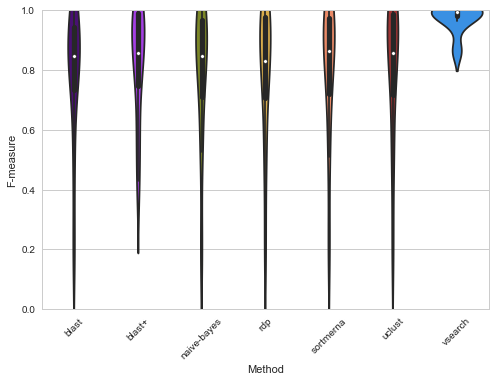

## gg_13_8_otus level 5

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
2,naive-bayes,False:0.7,0.674537,0.701561,0.843488,0.835066,0.839059
3,rdp,0.4,0.595964,0.791798,0.680328,0.880687,0.733048
1,blast+,0.001:10:0.75:0.99,0.556674,0.672949,0.701210,0.788116,0.727109
6,vsearch,100:0.51:0.99,0.524026,0.677256,0.652424,0.824075,0.697099
5,uclust,0.51:0.99:5,0.537931,0.685772,0.647502,0.812062,0.687733
4,sortmerna,0.51:0.99:1:0.9:1.0,0.533477,0.699714,0.608094,0.829165,0.671879
0,blast,1e-10,0.549269,0.724974,0.593849,0.844151,0.667888


,Method A,Method B,P
0,blast,blast+,0.057762
1,blast,rdp,0.008238
2,blast,sortmerna,0.999999
3,blast,uclust,0.678472
4,blast,vsearch,0.388718
5,blast,naive-bayes,1.000000
6,blast+,rdp,0.999997
7,blast+,sortmerna,0.457546
8,blast+,uclust,0.288530
9,blast+,vsearch,0.513041


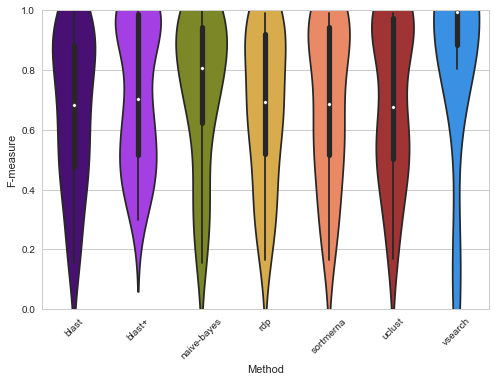

## gg_13_8_otus level 6

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
2,naive-bayes,False:0.7,0.395138,0.440494,0.756462,0.618746,0.664329
6,vsearch,1:0.51:0.9,0.464563,0.544289,0.463164,0.632890,0.515258
5,uclust,0.51:0.9:5,0.395616,0.463674,0.476240,0.612941,0.508065
3,rdp,0.3,0.421973,0.555281,0.465344,0.600198,0.503711
1,blast+,0.001:100:0.75:0.99,0.363413,0.411505,0.545393,0.509649,0.503425
0,blast,1e-10,0.455796,0.550526,0.441500,0.622074,0.498186
4,sortmerna,0.51:0.99:1:0.9:1.0,0.440423,0.514265,0.447001,0.595190,0.491202


,Method A,Method B,P
0,blast,blast+,1.000000
1,blast,rdp,1.000000
2,blast,sortmerna,1.000000
3,blast,uclust,1.000000
4,blast,vsearch,0.999261
5,blast,naive-bayes,1.000000
6,blast+,rdp,1.000000
7,blast+,sortmerna,0.999986
8,blast+,uclust,1.000000
9,blast+,vsearch,1.000000


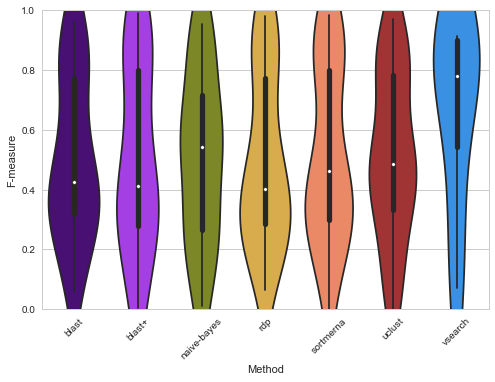

## unite_20.11.2016_clean_fullITS level 4

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
6,vsearch,10:0.99:0.99,0.832841,0.498162,0.626310,0.915205,0.706503
4,sortmerna,0.51:0.99:1:0.9:1.0,0.872001,0.536633,0.570488,0.892229,0.660916
1,blast+,0.001:1:0.99:0.99,0.863462,0.534183,0.562234,0.902586,0.654177
3,rdp,1.0,0.847151,0.528914,0.572056,0.875807,0.642382
5,uclust,1.0:0.9:1,0.827248,0.529405,0.543525,0.900079,0.639951
0,blast,1000,0.877336,0.569346,0.518953,0.910361,0.622397
2,naive-bayes,False:0.0,0.489944,0.364617,-0.981132,-0.981132,-0.981132


,Method A,Method B,P
0,blast,blast+,0.007231
1,blast,rdp,0.695158
2,blast,sortmerna,0.005634
3,blast,uclust,0.373997
4,blast,vsearch,0.000010
5,blast,naive-bayes,1.000000
6,blast+,rdp,0.994108
7,blast+,sortmerna,0.998724
8,blast+,uclust,0.941090
9,blast+,vsearch,0.004456


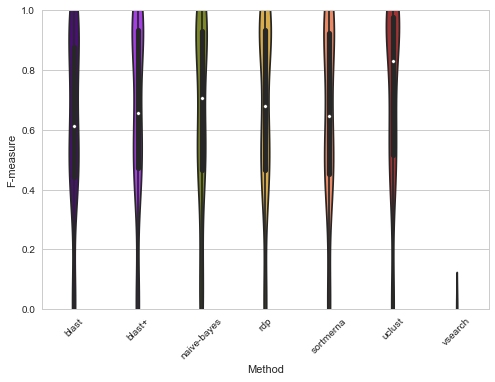

## unite_20.11.2016_clean_fullITS level 5

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
6,vsearch,100:0.99:0.99,0.819110,0.485921,0.624021,0.908351,0.702998
4,sortmerna,0.51:0.99:1:0.9:1.0,0.859666,0.528659,0.570488,0.892229,0.660916
1,blast+,0.001:1:0.99:0.99,0.851639,0.537402,0.562234,0.902586,0.654177
3,rdp,1.0,0.836905,0.519368,0.608735,0.875807,0.651464
5,uclust,1.0:0.9:1,0.810428,0.513007,0.539798,0.892547,0.635036
0,blast,1000,0.855505,0.557104,0.516097,0.902829,0.618294
2,naive-bayes,False:0.0,0.488419,0.364280,-0.981132,-0.981132,-0.981132


,Method A,Method B,P
0,blast,blast+,0.003328
1,blast,rdp,0.047249
2,blast,sortmerna,0.000941
3,blast,uclust,0.459664
4,blast,vsearch,0.000010
5,blast,naive-bayes,1.000000
6,blast+,rdp,0.999998
7,blast+,sortmerna,0.998724
8,blast+,uclust,0.782695
9,blast+,vsearch,0.016480


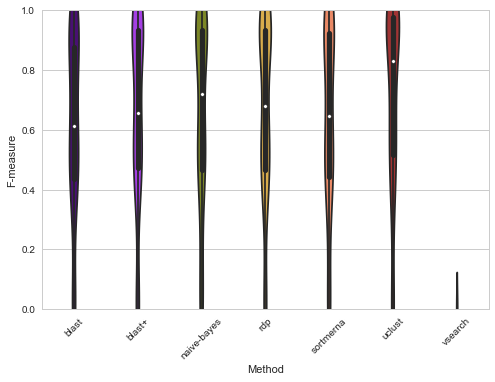

## unite_20.11.2016_clean_fullITS level 6

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
6,vsearch,10:0.99:0.99,0.634947,0.402015,0.634510,0.873905,0.707028
4,sortmerna,1.0:0.99:5:0.9:1.0,0.656102,0.442860,0.618356,0.885771,0.692788
3,rdp,0.9,0.647680,0.444039,0.546586,0.875060,0.636045
1,blast+,0.001:1:0.99:0.99,0.654569,0.441467,0.546366,0.873905,0.633799
0,blast,1000,0.611874,0.419597,0.454307,0.800586,0.545847
5,uclust,0.76:0.9:1,0.472961,0.331904,0.451409,0.756085,0.533303
2,naive-bayes,False:0.0,0.229194,0.174957,-0.981132,-0.981132,-0.981132


,Method A,Method B,P
0,blast,blast+,8.756711e-05
1,blast,rdp,6.812228e-05
2,blast,sortmerna,3.628813e-09
3,blast,uclust,9.781246e-01
4,blast,vsearch,4.055582e-08
5,blast,naive-bayes,1.000000e+00
6,blast+,rdp,9.999955e-01
7,blast+,sortmerna,1.034089e-04
8,blast+,uclust,1.604984e-04
9,blast+,vsearch,2.601652e-04


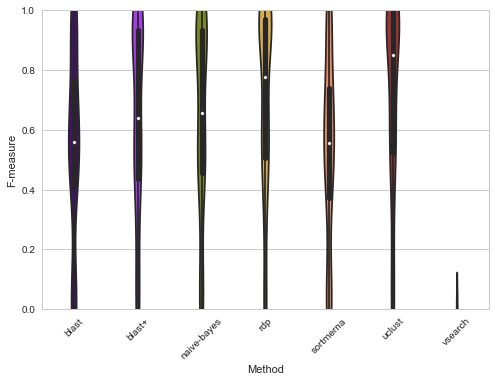

In [26]:
rank_optimized_method_performance_by_dataset(mock_results,
                                             dataset="Reference",
                                             metric="F-measure",
                                             level_range=range(4,7),
                                             display_fields=["Method",
                                                             "Parameters",
                                                             "Taxon Accuracy Rate",
                                                             "Taxon Detection Rate",
                                                             "Precision",
                                                             "Recall",
                                                             "F-measure"],
                                             paired=True,
                                             parametric=True,
                                             color=None,
                                             color_pallette=color_pallette)

## gg_13_8_otus level 6

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
6,vsearch,1:0.99:0.99,0.467694,0.541347,0.458804,0.620854,0.508580
1,blast+,0.001:1:0.99:0.99,0.465464,0.522325,0.452557,0.574553,0.496914
5,uclust,0.76:0.9:1,0.464277,0.549977,0.433727,0.579515,0.474965
0,blast,1e-10,0.455796,0.550526,0.441500,0.622074,0.498186
4,sortmerna,0.51:0.99:1:0.9:1.0,0.440423,0.514265,0.447001,0.595190,0.491202
2,naive-bayes,False:0.5,0.439995,0.476584,0.666926,0.632364,0.648347
3,rdp,0.4,0.424834,0.547409,0.471504,0.584945,0.499010


,Method A,Method B,P
0,blast,blast+,0.690865
1,blast,rdp,0.410313
2,blast,sortmerna,0.093039
3,blast,uclust,0.996490
4,blast,vsearch,0.748578
5,blast,naive-bayes,1.000000
6,blast+,rdp,0.276506
7,blast+,sortmerna,0.000735
8,blast+,uclust,1.000000
9,blast+,vsearch,0.999996


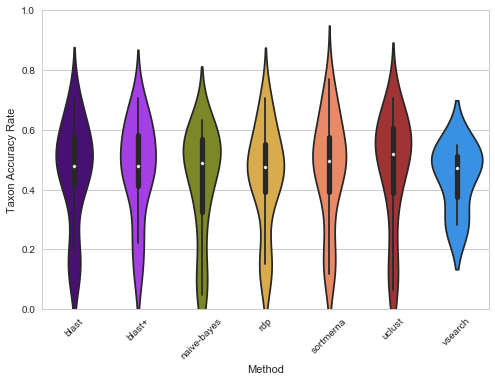

## unite_20.11.2016_clean_fullITS level 6

,Method,Parameters,Taxon Accuracy Rate,Taxon Detection Rate,Precision,Recall,F-measure
4,sortmerna,1.0:0.99:5:0.9:1.0,0.656102,0.442860,0.618356,0.885771,0.692788
3,rdp,0.3,0.656101,0.456690,0.509617,0.886089,0.608987
1,blast+,0.001:1:0.99:0.99,0.654569,0.441467,0.546366,0.873905,0.633799
6,vsearch,1:0.75:0.9,0.654532,0.453473,0.510355,0.886089,0.609529
0,blast,1000,0.611874,0.419597,0.454307,0.800586,0.545847
5,uclust,1.0:0.9:1,0.472961,0.331904,0.451409,0.756085,0.533303
2,naive-bayes,False:0.7,0.239053,0.174957,-0.981132,-0.981132,-0.981132


,Method A,Method B,P
0,blast,blast+,1.074044e-05
1,blast,rdp,3.333867e-11
2,blast,sortmerna,5.489092e-07
3,blast,uclust,0.000000e+00
4,blast,vsearch,1.331385e-10
5,blast,naive-bayes,1.000000e+00
6,blast+,rdp,9.999988e-01
7,blast+,sortmerna,9.999930e-01
8,blast+,uclust,0.000000e+00
9,blast+,vsearch,1.000000e+00


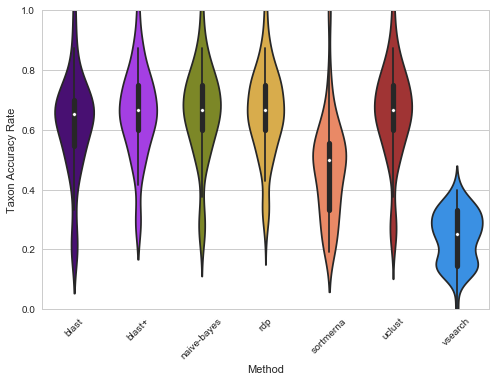

In [27]:
rank_optimized_method_performance_by_dataset(mock_results,
                                             dataset="Reference",
                                             metric="Taxon Accuracy Rate",
                                             level_range=range(6,7),
                                             display_fields=["Method",
                                                             "Parameters",
                                                             "Taxon Accuracy Rate",
                                                             "Taxon Detection Rate",
                                                             "Precision",
                                                             "Recall",
                                                             "F-measure"],
                                             paired=True,
                                             parametric=True,
                                             color=None,
                                             color_pallette=color_pallette)

## Beta diversity method/parameter comparisons
Principal coordinate analysis offers a neat way to assess the relative performance of multiple methods to reconstruct expected compositions. Methods that cluster with the "expected" composition probably outperform those that appear more distant on a PCoA plot. First, we need to merge biom tables from each method/parameter configuration for each dataset/reference/level combination, so that we can compare each method/parameter as a separate "sample".

__*Note: if you have added additional methods and are attempting to recompute results, set force=True.*__


In [28]:
merge_expected_and_observed_tables(expected_results_dir, results_dirs, taxonomy_level=6, force=False)

SystemExit: Skipping merge. Set force=True if you intend to generate new merged tables.

/Users/nbokulich/miniconda3/envs/q2-test/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Now we can manually select which table we want to view. This will output a Bray-Curtis PCoA plot, in addition to ANOSIM test results, which indicate whether at least two methods are significantly different from each other.

These plots are useful for visualizing the relative performance of different methods and their configurations relative to each other and to expected compositions, but are primarily a qualitative technique and do not really give us an idea of whether method X actually performs better than method Y.

__*Note that 2D plots will only appear if you are running notebooks locally. If viewing static notebooks online, make sure you are viewing this notebook in [nbviewer](http://nbviewer.jupyter.org/). (if viewing on GitHub, just copy the URL and paste into the search bar in nbviewer.)*__

In [ ]:
table = join(expected_results_dir, 'mock-18', 'gg_13_8_otus', 'merged_table.biom')
sample_md, results, pc, dm = beta_diversity_pcoa(table, method="braycurtis", dim=2,
                                                 permutations=99, col='method', 
                                                 colormap=color_pallette)

You can also view all beta diversity plots with a single command, ``batch_beta_diversity()``, but we will only show single dataset examples in these example notebooks.

### Average dissimilarity between expected results and observed results for each method 


As we already discussed, PCoA plots are good for a qualitative overview, but don't offer much in the way of quantitative comparison. Instead, we can directly compare the Bray-Curtis dissimilarity between methods, and utilize pairwise Mann-Whitney U tests to determine precisely which methods perform better (**lower dissimilarity = more accurate classification**). In the cell below, we will use distance comparisons to determine:

    1) Whether the dissimilarity between taxonomic assignment with different parameters of the same method is greater or less than the dissimilarity between taxonomic assignments with different methods, including the expected composition.
    2) which method (averaged across all configurations) most closely reproduces the expected composition.
    
You can generate boxplots for individual datasets one-by-one with ``per_method_boxplots()``, or for all datasets individually with ``fastlane_boxplots()``. However, here we are most interested in the average performance of methods across each dataset.

The command below violin plots of distribution of distances between expected composition and predicted compositions for each method (all parameter configurations) across all samples/datasets, and pairwise Mann Whitney U tests between these distributions.

In [ ]:
results = average_distance_boxplots(expected_results_dir, paired=False,
                                    use_best=False, color_pallette=color_pallette)
display(results)

### Average distance between expected results and observed results for each method with optimized parameters 
Reports the top-performing parameter configuration for each method, violin plots of distribution of distances between expected composition and predicted compositions for the top parameter for each method across all samples/datasets, and pairwise paired Wilcoxon signed rank tests between these distributions.

In [ ]:
results = average_distance_boxplots(expected_results_dir,
                                    color_pallette=color_pallette)
results